## **Mariia Sychova**

In [ ]:
import pandas as pd
from pathlib import Path

PATH = Path("data")
files = sorted(PATH.glob("*.xlsx"))

def read_one(fp: Path) -> pd.DataFrame:
    df = pd.read_excel(fp, dtype=str)
    df.columns = df.columns.str.strip()
    return df

raw = pd.concat([read_one(f) for f in files], ignore_index=True)
raw.head()

Станом на Освітній ступінь                  Основа вступу  \
0  2019-10-01 00:00:00         Бакалавр  Повна загальна середня освіта   
1  2019-10-01 00:00:00         Бакалавр  Повна загальна середня освіта   
2  2019-10-01 00:00:00         Бакалавр  Повна загальна середня освіта   
3  2019-10-01 00:00:00         Бакалавр  Повна загальна середня освіта   
4  2019-10-01 00:00:00         Бакалавр  Повна загальна середня освіта   

  Код спеціальності         Назва спеціальності Спеціалізація  \
0               011  Освітні, педагогічні науки           NaN   
1               011  Освітні, педагогічні науки           NaN   
2               011  Освітні, педагогічні науки           NaN   
3               011  Освітні, педагогічні науки           NaN   
4               011  Освітні, педагогічні науки           NaN   

                 Регіон  Код  \
0       Одеська область  353   
1     Черкаська область   88   
2   Чернівецька область   61   
3  Чернігівська область  158   
4               м. Київ  194   

                                Назва закладу освіти Код головного закладу  \
0               Міжнародний гуманітарний університет                   NaN   
1  Уманський державний педагогічний університет і...                   NaN   
2  Чернівецький національний університет імені Юр...                   NaN   
3  Національний університет "Чернігівський колегі...                   NaN   
4  Національний педагогічний університет імені М....                   NaN   

  Форма власності                      Підпорядкування Денна (бюджет)  \
0        Приватна                  Без підпорядкування              0   
1        Державна  Міністерство освіти і науки України              0   
2        Державна  Міністерство освіти і науки України              0   
3        Державна  Міністерство освіти і науки України              2   
4        Державна  Міністерство освіти і науки України              1   

  Денна (контракт) Заочна (бюджет) Заочна (контракт) Вечірня (бюджет)  \
0                2               0                 0                0   
1                2               0                 1                0   
2                3               0                 0                0   
3               11               1                 5                0   
4               20               0                 7                0   

  Вечірня (контракт)  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [ ]:
rename_map = {
    'Станом на': 'date',
    'Освітній ступінь': 'degree',
    'Основа вступу': 'entry_basis',
    'Код спеціальності': 'spec_code',
    'Назва спеціальності': 'spec_name',
    'Спеціалізація': 'specialization',
    'Регіон': 'region',
    'Код': 'code',
    'Назва закладу освіти': 'institution',
    'Код головного закладу': 'head_inst_code',
    'Форма власності': 'ownership',
    'Підпорядкування': 'authority',
    'Денна (бюджет)': 'day_budget',
    'Денна (контракт)': 'day_contract',
    'Заочна (бюджет)': 'part_time_budget',
    'Заочна (контракт)': 'part_time_contract',
    'Вечірня (бюджет)': 'evening_budget',
    'Вечірня (контракт)': 'evening_contract',
}

df = raw.rename(columns={c: rename_map.get(c, c) for c in raw.columns})

df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce').dt.date

df.head()

date    degree                    entry_basis spec_code  \
0  2019-01-10  Бакалавр  Повна загальна середня освіта       011   
1  2019-01-10  Бакалавр  Повна загальна середня освіта       011   
2  2019-01-10  Бакалавр  Повна загальна середня освіта       011   
3  2019-01-10  Бакалавр  Повна загальна середня освіта       011   
4  2019-01-10  Бакалавр  Повна загальна середня освіта       011   

                    spec_name specialization                region code  \
0  Освітні, педагогічні науки            NaN       Одеська область  353   
1  Освітні, педагогічні науки            NaN     Черкаська область   88   
2  Освітні, педагогічні науки            NaN   Чернівецька область   61   
3  Освітні, педагогічні науки            NaN  Чернігівська область  158   
4  Освітні, педагогічні науки            NaN               м. Київ  194   

                                         institution head_inst_code ownership  \
0               Міжнародний гуманітарний університет            NaN  Приватна   
1  Уманський державний педагогічний університет і...            NaN  Державна   
2  Чернівецький національний університет імені Юр...            NaN  Державна   
3  Національний університет "Чернігівський колегі...            NaN  Державна   
4  Національний педагогічний університет імені М....            NaN  Державна   

                             authority day_budget day_contract  \
0                  Без підпорядкування          0            2   
1  Міністерство освіти і науки України          0            2   
2  Міністерство освіти і науки України          0            3   
3  Міністерство освіти і науки України          2           11   
4  Міністерство освіти і науки України          1           20   

  part_time_budget part_time_contract evening_budget evening_contract  
0                0                  0              0                0  
1                0                  1              0                0  
2                0                  0              0                0  
3                1                  5              0                0  
4                0                  7              0                0

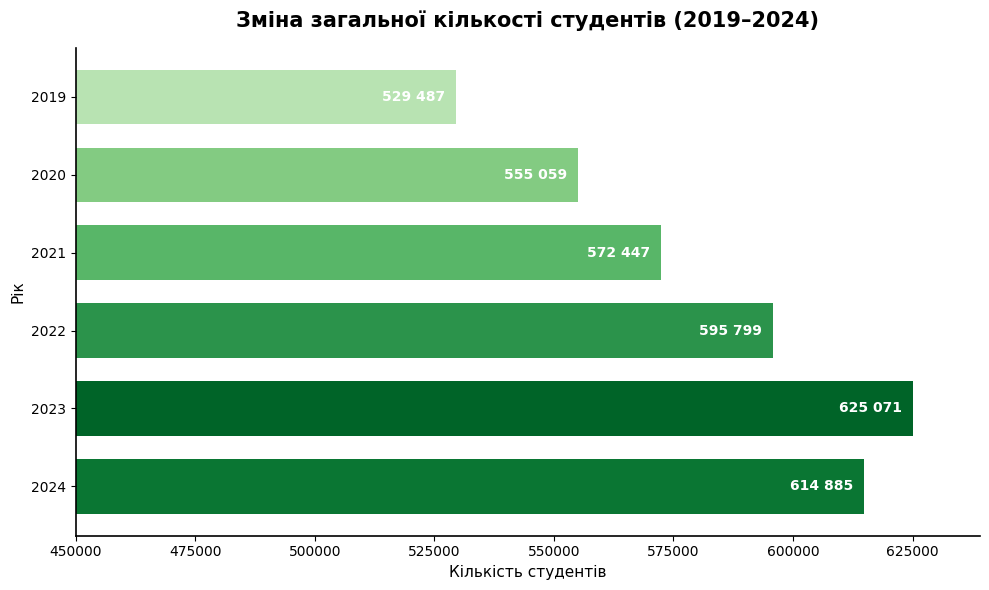

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

form_cols = [
    'day_budget', 'day_contract',
    'part_time_budget', 'part_time_contract',
    'evening_budget', 'evening_contract'
]
form_cols = [c for c in form_cols if c in df.columns]

for c in form_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0)

df['total_students'] = df[form_cols].sum(axis=1)

year_order = [2019, 2020, 2021, 2022, 2023, 2024]
students_by_year = (
    df.assign(year=df['date'].apply(lambda d: d.year))
      .groupby('year', as_index=False)['total_students']
      .sum()
      .rename(columns={'total_students': 'students'})
      .set_index('year')
      .reindex(year_order)
      .fillna(0)
      .reset_index()
)

students_by_year['change'] = students_by_year['students'].diff()

years = students_by_year['year'].astype(int).values
vals = students_by_year['students'].values

ymin_pref = 450_000
ymax = vals.max() if len(vals) else 0
ymin = ymin_pref if ymax > ymin_pref else max(0, int(vals.min() * 0.9))
padding = int(max(1, 0.08 * (max(ymax - ymin, 1))))
y0, y1 = ymin, ymax + padding

vmin, vmax = vals.min(), vals.max()
den = (vmax - vmin) if vmax != vmin else 1.0
norm01 = (vals - vmin) / den
shades = 0.30 + 0.60 * norm01
colors = [plt.cm.Greens(s) for s in shades]

plt.figure(figsize=(10, 6))
bars = plt.barh(
    years, vals, height=0.7,
    color=colors
)

pad = 0.012 * (y1 - y0)
for y, v, shade in zip(years, vals, shades):
    label = f"{int(v):,}".replace(',', ' ')
    txt_color = 'white'
    x = max(v - pad, y0 + pad)
    plt.text(x, y, label, ha='right', va='center', fontsize=10, fontweight='600', color=txt_color)

plt.xlim(y0, y1)
plt.title('Зміна загальної кількості студентів (2019–2024)', fontsize=15, pad=15, fontweight='600')
plt.xlabel('Кількість студентів', fontsize=11)
plt.ylabel('Рік', fontsize=11)
plt.grid(False)
plt.yticks(years)

ax = plt.gca()
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

plt.tight_layout()
plt.show()

table = students_by_year.copy()
table['students'] = table['students'].round().astype(int)
table['change'] = table['change'].round().fillna(0).astype(int)
table['change'] = table['change'].apply(lambda x: f"+{x}" if x > 0 else (f"{x}" if x < 0 else "0"))
table.loc[0, 'change'] = ""
table = table.rename(columns={
    'year': 'Рік',
    'students': 'Кількість студентів',
    'change': 'Зміна від попереднього року'
})

display(
    table.style
        .hide(axis='index')
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([
            dict(selector='th', props=[('text-align', 'center')])
        ])
)


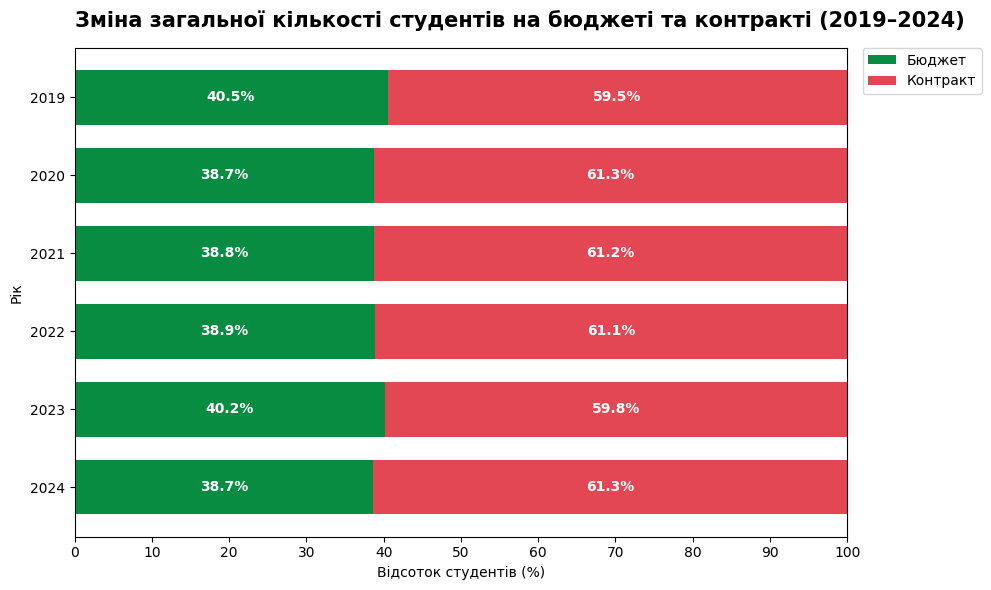

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cols_budget_contract = [
    'day_budget', 'part_time_budget', 'evening_budget',
    'day_contract', 'part_time_contract', 'evening_contract'
]

for c in cols_budget_contract:
    df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0)

df['total_budget'] = df[['day_budget','part_time_budget','evening_budget']].sum(axis=1)
df['total_contract'] = df[['day_contract','part_time_contract','evening_contract']].sum(axis=1)

df['year'] = pd.to_datetime(df['date']).dt.year

students_by_year = (
    df.groupby('year')[['total_budget', 'total_contract']]
      .sum()
      .reset_index()
)

table = students_by_year[['year', 'total_budget', 'total_contract']] \
    .rename(columns={'year': 'Рік', 'total_budget': 'Бюджет', 'total_contract': 'Контракт'})

students_by_year['total'] = students_by_year['total_budget'] + students_by_year['total_contract']
students_by_year['budget_pct'] = students_by_year['total_budget'] / students_by_year['total'] * 100
students_by_year['contract_pct'] = students_by_year['total_contract'] / students_by_year['total'] * 100

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#088C42', '#E44754']
y = np.arange(len(students_by_year['year']))
bar_height = 0.7

ax.barh(y, students_by_year['budget_pct'], color=colors[0], label='Бюджет', height=bar_height)
ax.barh(y, students_by_year['contract_pct'],
        left=students_by_year['budget_pct'], color=colors[1], label='Контракт', height=bar_height)

ax.set_xlabel('Відсоток студентів (%)')
ax.set_ylabel('Рік')
ax.set_title('Зміна загальної кількості студентів на бюджеті та контракті (2019–2024)',
             fontsize=15, pad=15, fontweight='600', loc='left')
ax.set_yticks(y)
ax.set_yticklabels(students_by_year['year'])
ax.invert_yaxis()

ax.set_xlim(0, 100)
ax.set_xticks(np.arange(0, 101, 10))

fig.subplots_adjust(right=0.8)
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), borderaxespad=0.)

for i, (b, c) in enumerate(zip(students_by_year['budget_pct'], students_by_year['contract_pct'])):
    ax.text(b/2, i, f'{b:.1f}%', va='center', ha='center',
            color='white', fontweight='600')
    ax.text(b + c/2, i, f'{c:.1f}%', va='center', ha='center',
            color='white', fontweight='600')

plt.tight_layout()
plt.show()

def fmt_int(x):
    return f'{int(round(x)):,}'.replace(',', ' ')

try:
    from IPython.display import display
    styled = (
        table.style
        .format({'Бюджет': fmt_int, 'Контракт': fmt_int})
        .hide(axis='index')
        .set_table_styles([
            {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', '600')]},
            {'selector': 'td', 'props': [('text-align', 'center')]}
        ])
    )
    display(styled)
except Exception:
    print(table.assign(
        **{'Бюджет': table['Бюджет'].map(fmt_int),
           'Контракт': table['Контракт'].map(fmt_int)}
    ).to_string(index=False))


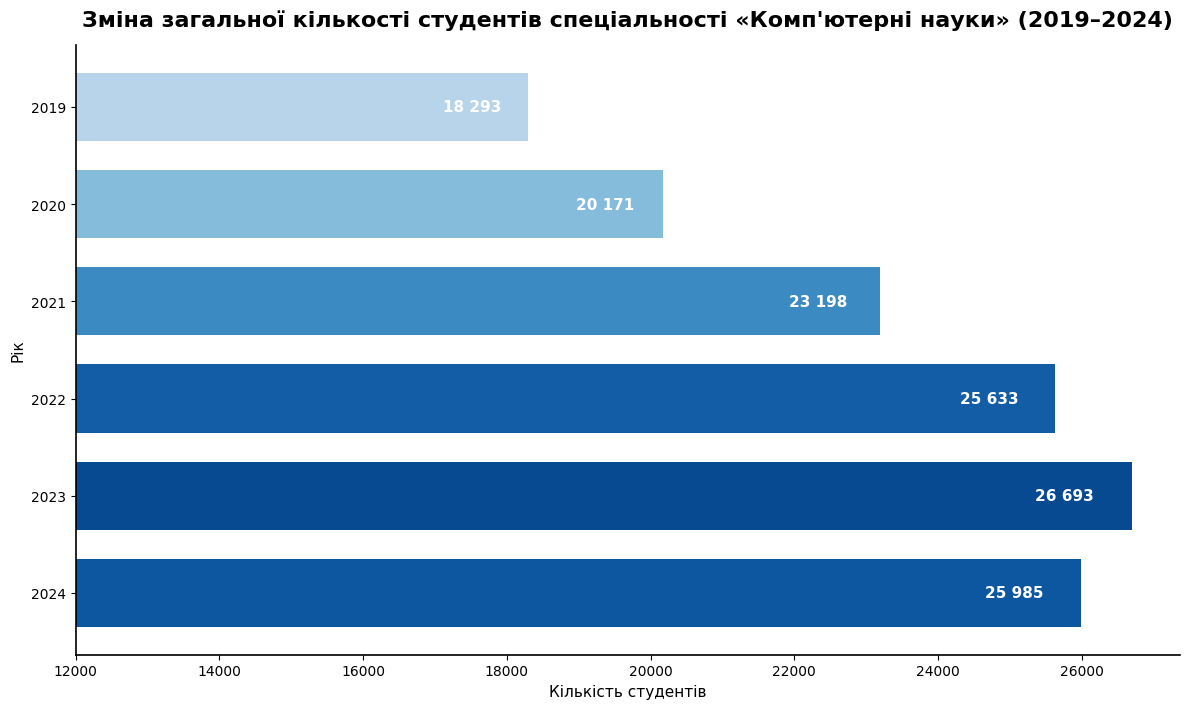

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

form_cols = [
    'day_budget', 'day_contract',
    'part_time_budget', 'part_time_contract',
    'evening_budget', 'evening_contract'
]
form_cols = [c for c in form_cols if c in df.columns]

for c in form_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0)

df['spec_code'] = df['spec_code'].astype(str).str.strip()

mask_cs = (
    (df['spec_code'] == '122') |
    (df['spec_name'].astype(str).str.contains(r"Комп'?ютерн", case=False, na=False))
)

df_cs = df.loc[mask_cs].copy()
df_cs['total_students'] = df_cs[form_cols].sum(axis=1)
df_cs['year'] = pd.to_datetime(df_cs['date']).dt.year

year_order = list(range(2019, 2025))

students_by_year = (
    df_cs.groupby('year')['total_students']
         .sum()
         .reindex(year_order, fill_value=0)
         .rename('students')
         .reset_index()
)

students_by_year['change'] = students_by_year['students'].diff().fillna(0).astype(int)

def fmt_int(x):
    return f"{int(x):,}".replace(",", " ")

def fmt_delta(x):
    x = int(x)
    sign = "+" if x > 0 else ""
    return f"{sign}{fmt_int(x)}"

vals = students_by_year['students'].values
vmin, vmax = vals.min(), vals.max()
den = (vmax - vmin) if vmax != vmin else 1.0
norm01 = (vals - vmin) / den
shades = 0.30 + 0.60 * norm01
colors = [plt.cm.Blues(s) for s in shades]

fig, ax = plt.subplots(figsize=(12, 7.2))

bars = ax.barh(
    students_by_year['year'],
    students_by_year['students'],
    height=0.7,
    color=colors,
    edgecolor='none'
)

years  = students_by_year['year'].to_list()
totals = students_by_year['students'].astype(float).to_list()

min_val = float(students_by_year['students'].replace(0, np.nan).min())
max_val = float(students_by_year['students'].max())
if np.isnan(min_val):
    min_val = 0
span = max(1.0, max_val - min_val)
x0 = max(0, min_val - span*0.15)
x1 = max_val + span*0.08
ax.set_xlim(12000, x1)

for bar, total in zip(bars, totals):
    if total > 0:
        cx = bar.get_x() + bar.get_width() * 0.98
        cy = bar.get_y() + bar.get_height() / 2
        ax.text(
            cx, cy, fmt_int(total),
            ha='right', va='center',
            fontsize=11, fontweight='600', color='white'
        )

ax.set_title(
    "Зміна загальної кількості студентів спеціальності «Комп'ютерні науки» (2019–2024)",
    fontsize=16, pad=14, fontweight='600'
)
ax.set_ylabel("Рік", fontsize=11)
ax.set_xlabel("Кількість студентів", fontsize=11)

ax.grid(False)
ax.set_yticks(year_order)
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

plt.tight_layout()
plt.show()

table = students_by_year.rename(columns={
    'year': 'Рік', 'students': 'Кількість студентів',
    'change': 'Зміна від попереднього року'
}).copy()

table['Кількість студентів'] = table['Кількість студентів'].map(fmt_int)
table['Зміна від попереднього року'] = table['Зміна від попереднього року'].map(fmt_delta)

table.loc[table['Рік'] == 2019, 'Зміна від попереднього року'] = ""

display(
    table
    .style
    .hide(axis='index')
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([
        dict(selector='th', props=[('text-align', 'center')])
    ])
)


## **Evelina Pyechkurova**

In [ ]:
import requests
from statistics import mean
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1st PLOT: number of universities/institutions in each region + number of students/applications in there + MAP of UKRAINE with it (2024 VS 2025)
URL = 'https://api.abitly.org/regions'

regions = requests.get(URL).json()
region_ids = [r['id'] for r in regions]

In [ ]:
# 2nd PLOT: for each region, comparing its universities by number of abiturients/students/public/private education???
API_BASE = 'https://api.abitly.org/universities'

def fetch_region_universities(region_id):
    params = {
        'regionIds[]': region_id,
        'page': 1,
        'limit': 0
    }
    resp = requests.get(API_BASE, params=params)
    resp.raise_for_status()
    return resp.json().get("data", [])


def compute_region_stats(region_name, region_unis):
    valid_unis = [
        u for u in region_unis
        if not (u['budgetMeanScore'] == 0 and u['contractMeanScore'] == 0)
    ]

    n_unis = len(valid_unis)

    if n_unis == 0:
        return {
            "name": region_name,
            "universities": 0,
            "applications_total": 0,
            "applications_avg_per_uni": 0,
            "budget_mean_score_avg": 0,
            "contract_mean_score_avg": 0,
        }

    applications = [u['submittedApplicationsQuantity'] for u in region_unis]
    budget_scores = [u['budgetMeanScore'] for u in valid_unis if u['budgetMeanScore'] > 0]
    contract_scores = [u['contractMeanScore'] for u in region_unis if u['contractMeanScore'] > 0]

    return {
        "name": region_name,
        "universities": n_unis,
        "applications_total": sum(applications),
        "applications_avg_per_uni": sum(applications) / n_unis,
        "budget_mean_score_avg": mean(budget_scores),
        "contract_mean_score_avg": mean(contract_scores),
    }


def collect_all_regions_stats(regions):
    stats = {}
    for region in regions:
        (r_id, r_name) = (region['id'], region['name']['uk'])
        unis = fetch_region_universities(r_id)
        stats[r_id] = compute_region_stats(r_name, unis)
    return stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

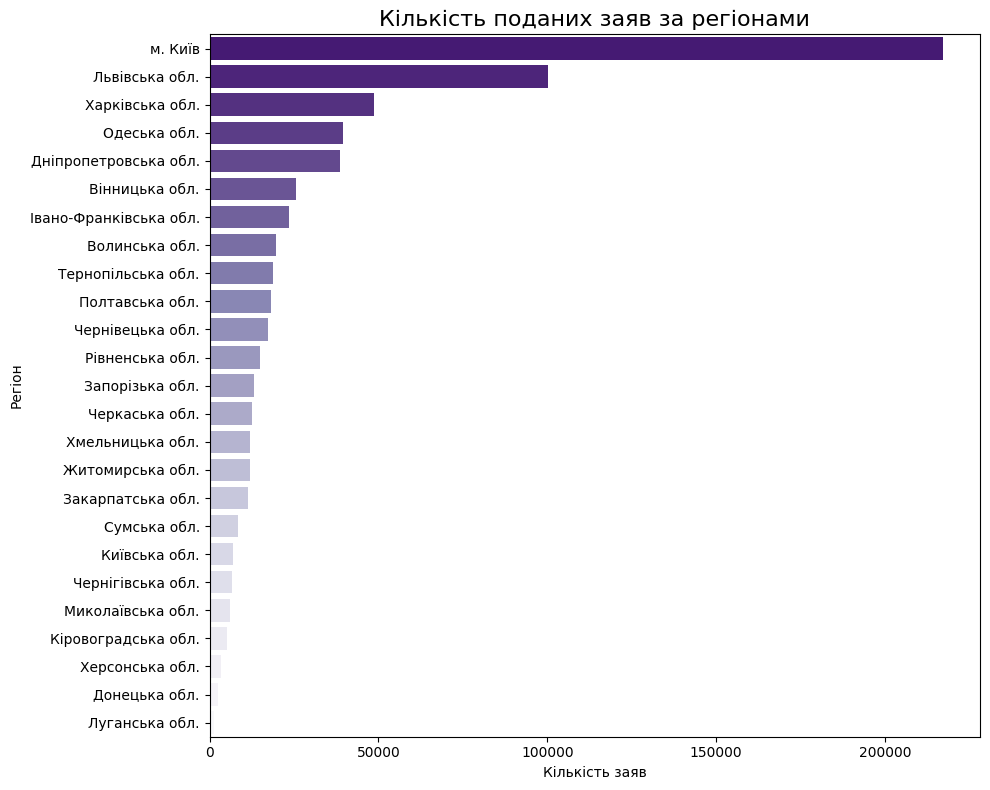

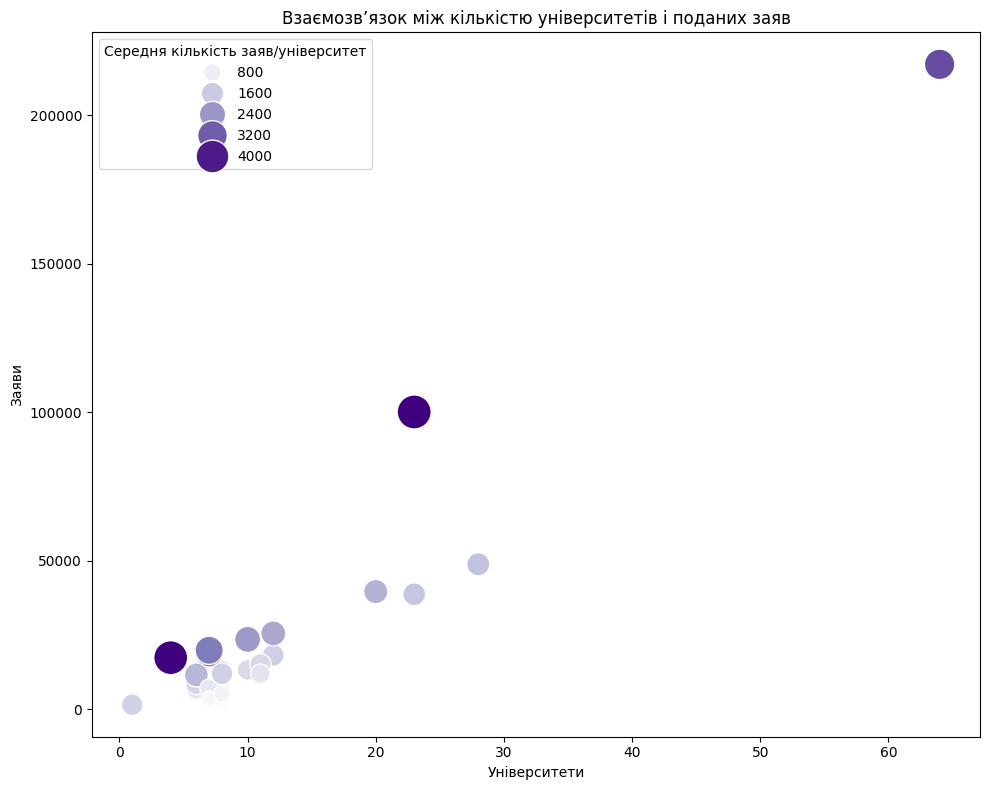

name  universities  applications_total  \
14                 м. Київ            64              217222   
20         Харківська обл.            28               48763   
3    Дніпропетровська обл.            23               38680   
15            Одеська обл.            20               39560   
7          Запорізька обл.            10               13151   
12          Львівська обл.            23              100091   
16         Полтавська обл.            12               18103   
17         Рівненська обл.            11               15083   
23          Черкаська обл.             8               12530   
19      Тернопільська обл.             7               18789   
1           Вінницька обл.            12               25484   
22        Хмельницька обл.            11               11897   
13       Миколаївська обл.             8                6110   
25       Чернігівська обл.             6                6562   
18            Сумська обл.             6                8412   
6        Закарпатська обл.             6               11477   
8   Івано-Франківська обл.            10               23464   
9            Київська обл.             7                6940   
2           Волинська обл.             7               19784   
5         Житомирська обл.             8               11885   
21         Херсонська обл.             7                3508   
4            Донецька обл.             8                2481   
24        Чернівецька обл.             4               17300   
10     Кіровоградська обл.             8                5115   
11          Луганська обл.             1                1456   

    applications_avg_per_uni  budget_mean_score_avg  contract_mean_score_avg  
14               3394.093750             163.000000               146.857143  
20               1741.535714             163.611111               153.857143  
3                1681.739130             152.250000               144.521739  
15               1978.000000             166.470588               151.950000  
7                1315.100000             160.285714               149.700000  
12               4351.782609             161.090909               145.739130  
16               1508.583333             153.333333               144.000000  
17               1371.181818             152.428571               143.272727  
23               1566.250000             150.000000               137.625000  
19               2684.142857             157.400000               141.428571  
1                2123.666667             156.000000               142.666667  
22               1081.545455             158.428571               139.454545  
13                763.750000             153.600000               148.375000  
25               1093.666667             158.750000               149.000000  
18               1402.000000             152.833333               146.333333  
6                1912.833333             154.000000               136.500000  
8                2346.400000             154.250000               141.200000  
9                 991.428571             154.500000               142.285714  
2                2826.285714             149.000000               138.714286  
5                1485.625000             142.333333               132.125000  
21                501.142857             159.600000               143.285714  
4                 310.125000             151.571429               142.125000  
24               4325.000000             158.500000               139.750000  
10                639.375000             150.500000               136.500000  
11               1456.000000             155.000000               146.000000

In [ ]:
# TODO: create Ukraine-map plot displaying distribution of unis/applications
region_df = pd.DataFrame.from_dict(
    collect_all_regions_stats(regions),
    orient='index'
)

region_df_sorted = region_df.sort_values(
    by='applications_total',
    ascending=False
)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=region_df_sorted,
    y='name',
    x='applications_total',
    palette='Purples_r'
)
plt.title('Кількість поданих заяв за регіонами', fontsize=16)
plt.xlabel('Кількість заяв')
plt.ylabel('Регіон')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(data=region_df, x="universities", y="applications_total", hue="applications_avg_per_uni",
                size="applications_avg_per_uni", palette="Purples", sizes=(100, 600))
plt.title("Взаємозв’язок між кількістю університетів і поданих заяв")
plt.xlabel("Університети")
plt.ylabel("Заяви")
plt.legend(title="Середня кількість заяв/університет")
plt.tight_layout()
plt.show()

region_df

In [ ]:
# For each region:
# UNI with highest number of applications
# UNI with

## **Andrii Negrub**

In [ ]:
import pandas as pd

# Load table 1.7 from Excel file
df = pd.read_excel('vfpo_Ukr_2024.xls',
                   sheet_name='1.7',
                   skiprows=6,
                   usecols=[0, 1, 2],
                   names=['region', 'institutions', 'students'])

# Clean data
df = df.dropna(subset=['region'])
df = df[df['region'].str.strip() != '']
df['students'] = pd.to_numeric(df['students'], errors='coerce')
df['institutions'] = pd.to_numeric(df['institutions'], errors='coerce')
df = df.dropna(subset=['students', 'institutions'])
df['students'] = df['students'].astype(int)
df['institutions'] = df['institutions'].astype(int)

print(f"Loaded {len(df)} regions with data")
print(f"Total students: {df['students'].sum():,}")
print(f"Total institutions: {df['institutions'].sum()}")
print(df)

Loaded 22 regions with data
Total students: 378,108
Total institutions: 307
               region  institutions  students
0           Вінницька            14     17275
1           Волинська             8     11850
2    Дніпропетровська            31     41201
4         Житомирська            14     15360
5        Закарпатська             7      9831
6          Запорізька            10     13873
7   Івано-Франківська            12     18997
8            Київська            14     11631
9      Кіровоградська            11      9312
11          Львівська            20     28291
12       Миколаївська             8     10934
13            Одеська            22     28360
14         Полтавська            13     17538
15         Рівненська             4     11734
16            Сумська            10     14311
17      Тернопільська            13     17173
18         Харківська            27     22014
20        Хмельницька            10     11866
21          Черкаська            11     11067
22  

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
def map_region_name(name):
    if name == 'м. Київ':
        return 'Київ'  # GeoJSON has "Київ" not "м. Київ"
    else:
        return name + ' область'

df['region_geojson'] = df['region'].apply(map_region_name)

print("Region name mapping:")
print("=" * 60)
for idx, row in df.iterrows():
    print(f"{row['region']:25s} → {row['region_geojson']}")
print("=" * 60)
print(df)

Region name mapping:
Вінницька                 → Вінницька область
Волинська                 → Волинська область
Дніпропетровська          → Дніпропетровська область
Житомирська               → Житомирська область
Закарпатська              → Закарпатська область
Запорізька                → Запорізька область
Івано-Франківська         → Івано-Франківська область
Київська                  → Київська область
Кіровоградська            → Кіровоградська область
Львівська                 → Львівська область
Миколаївська              → Миколаївська область
Одеська                   → Одеська область
Полтавська                → Полтавська область
Рівненська                → Рівненська область
Сумська                   → Сумська область
Тернопільська             → Тернопільська область
Харківська                → Харківська область
Хмельницька               → Хмельницька область
Черкаська                 → Черкаська область
Чернівецька               → Чернівецька область
Чернігівська            

In [ ]:
import geopandas as gpd

# Load GeoJSON with Ukrainian regions
gdf = gpd.read_file('ukraineV2_fixed.geojson')

print(f"Loaded {len(gdf)} regions from GeoJSON")
print("\nColumns:", gdf.columns.tolist())
print("\nFirst few regions:")
print(gdf[['name:ua', 'name:eng']])

Loaded 26 regions from GeoJSON

Columns: ['@id', 'admin_level', 'boundary', 'flag', 'iso3166-2', 'koatuu', 'name:ua', 'name:eng', 'type', 'wikipedia', 'geometry']

First few regions:
                      name:ua                       name:eng
0           Луганська область                Luhanska oblast
1      Кіровоградська область           Kirovohradska oblast
2             Одеська область                  Odeska oblast
3          Херсонська область              Khersonska oblast
4        Миколаївська область             Mykolaivska oblast
5    Дніпропетровська область         Dnipropetrovska oblast
6           Вінницька область               Vinnytska oblast
7           Черкаська область               Cherkaska oblast
8        Чернігівська область            Chernihivska oblast
9         Чернівецька область            Chernivetska oblast
10  Автономна Республіка Крим  Autonomous Republic of Crimea
11           Донецька область                Donetska oblast
12  Івано-Франківська об

In [ ]:
gdf_merged = gdf.merge(df, left_on='name:ua', right_on='region_geojson', how='left')

print(f"Total regions in map: {len(gdf_merged)}")
print(f"Regions with data: {gdf_merged['students'].notna().sum()}")
print(f"Regions without data: {gdf_merged['students'].isna().sum()}")

print("\nRegions without data:")
no_data = gdf_merged[gdf_merged['students'].isna()]['name:ua'].tolist()
for region in no_data:
    print(f"  - {region}")

print("\n")
print(gdf_merged[['name:ua', 'students', 'institutions']])

Total regions in map: 26
Regions with data: 22
Regions without data: 4

Regions without data:
  - Луганська область
  - Херсонська область
  - Автономна Республіка Крим
  - Донецька область


                      name:ua  students  institutions
0           Луганська область       NaN           NaN
1      Кіровоградська область    9312.0          11.0
2             Одеська область   28360.0          22.0
3          Херсонська область       NaN           NaN
4        Миколаївська область   10934.0           8.0
5    Дніпропетровська область   41201.0          31.0
6           Вінницька область   17275.0          14.0
7           Черкаська область   11067.0          11.0
8        Чернігівська область    8267.0          12.0
9         Чернівецька область   10728.0          14.0
10  Автономна Республіка Крим       NaN           NaN
11           Донецька область       NaN           NaN
12  Івано-Франківська область   18997.0          12.0
13         Харківська область   22014.0          27.

In [ ]:
# # FIX: Cut Kyiv City out of Kyiv Oblast geometry
# gdf_plot = gdf_merged.copy()

# kyiv_city_geom = gdf_plot[gdf_plot['name:ua'] == 'Київ']['geometry'].values[0]
# kyiv_oblast_idx = gdf_plot[gdf_plot['name:ua'] == 'Київська область'].index[0]

# # Subtract Kyiv City from Kyiv Oblast
# gdf_plot.at[kyiv_oblast_idx, 'geometry'] = gdf_plot.at[kyiv_oblast_idx, 'geometry'].difference(kyiv_city_geom)

# print("✓ Cut Kyiv City out of Kyiv Oblast geometry")

In [ ]:
from shapely.geometry import LineString, MultiLineString
from shapely.ops import clip_by_rect

def create_diagonal_stripes_for_region(geometry, spacing=0.05, angle=45):
    """
    Create diagonal stripe lines clipped to region geometry

    Parameters:
    -----------
    geometry : shapely geometry
        The region geometry to fill with stripes
    spacing : float
        Distance between stripe lines (in degrees)
    angle : float
        Angle of stripes in degrees (45 = diagonal)
    """
    bounds = geometry.bounds
    minx, miny, maxx, maxy = bounds

    # Calculate diagonal extent
    width = maxx - minx
    height = maxy - miny
    diagonal = np.sqrt(width**2 + height**2)

    # Convert angle to radians
    angle_rad = np.radians(angle)

    # Calculate direction vector for lines (along the stripe)
    dx = np.cos(angle_rad)
    dy = np.sin(angle_rad)

    # Perpendicular vector for spacing (perpendicular to stripes)
    perp_dx = -dy
    perp_dy = dx

    # Center point of the region
    center_x = (minx + maxx) / 2
    center_y = (miny + maxy) / 2

    # Start point - extend from center perpendicular to stripe direction
    start_x = center_x - diagonal * perp_dx
    start_y = center_y - diagonal * perp_dy

    all_lines = []

    # Generate parallel lines covering the entire region
    num_lines = int((3 * diagonal) / spacing) + 1
    for i in range(num_lines):
        # Offset perpendicular to line direction
        offset_x = start_x + i * spacing * perp_dx
        offset_y = start_y + i * spacing * perp_dy

        # Create line along the stripe direction (extend in both directions)
        line_start = (offset_x - diagonal * dx, offset_y - diagonal * dy)
        line_end = (offset_x + diagonal * dx, offset_y + diagonal * dy)

        line = LineString([line_start, line_end])

        # Clip line to region geometry
        try:
            clipped = line.intersection(geometry)
            if not clipped.is_empty:
                all_lines.append(clipped)
        except:
            continue

    return all_lines

def add_stripes_to_figure(fig, gdf_plot, spacing=0.08, angle=45, width=1.5, color='rgba(117, 117, 117, 0.4)'):
    """
    Add diagonal stripes to regions with no data

    Parameters:
    -----------
    fig : plotly figure
        The figure to add stripes to
    gdf_plot : GeoDataFrame
        The geodataframe with region data
    spacing : float
        Distance between stripe lines (default: 0.08)
    angle : float
        Angle of stripes in degrees (default: 45)
    width : float
        Width of stripe lines (default: 1.5)
    color : str
        Color of stripes in rgba format (default: 'rgba(117, 117, 117, 0.4)')
    """
    no_data_regions = gdf_plot[~gdf_plot['has_data']]

    for idx, region in no_data_regions.iterrows():
        # Generate clipped stripe lines
        stripe_lines = create_diagonal_stripes_for_region(
            region.geometry,
            spacing=spacing,
            angle=angle
        )

        # Extract coordinates for plotting
        for line_geom in stripe_lines:
            if line_geom.geom_type == 'LineString':
                coords = list(line_geom.coords)
                lons = [c[0] for c in coords]
                lats = [c[1] for c in coords]

                fig.add_trace(go.Scattermapbox(
                    lon=lons,
                    lat=lats,
                    mode='lines',
                    line=dict(width=width, color=color),
                    showlegend=False,
                    hoverinfo='skip'
                ))
            elif line_geom.geom_type == 'MultiLineString':
                for line in line_geom.geoms:
                    coords = list(line.coords)
                    lons = [c[0] for c in coords]
                    lats = [c[1] for c in coords]

                    fig.add_trace(go.Scattermapbox(
                        lon=lons,
                        lat=lats,
                        mode='lines',
                        line=dict(width=width, color=color),
                        showlegend=False,
                        hoverinfo='skip'
                    ))

In [ ]:
import plotly.graph_objects as go
import base64
import numpy as np

# =================================================

COLORBAR_TEXT_COLOR = '#1c1c1c'
MAPBOX_BG_COLOR = '#FFFBF2'
BORDER_COLOR = '#757575'

# =================================================

custom_bg_style = {
    "version": 8,
    "name": "white-bg",
    "sources": {},
    "layers": [
        {
            "id": "background",
            "type": "background",
            "paint": {
                "background-color": MAPBOX_BG_COLOR
            }
        }
    ]
}


# =================================================

# Prepare data
gdf_plot = gdf_merged.copy()
gdf_plot['students_plot'] = gdf_plot['students'].fillna(0)
gdf_plot['has_data'] = gdf_plot['students'].notna()
geojson_data = gdf_plot.__geo_interface__

# Create hover text
hover_text = []
for idx, row in gdf_plot.iterrows():
    if row['has_data']:
        text = f"<b style='font-size:16px'>{row['name:ua']}</b><br>Студентів: {int(row['students']):,}<br>Закладів: {int(row['institutions'])}"
    else:
        text = f"<b style='font-size:16px'>{row['name:ua']}</b><br><i>Немає даних</i>"
    hover_text.append(text)

# Create choropleth map
fig = go.Figure(go.Choroplethmapbox(
    geojson=geojson_data,
    locations=gdf_plot.index,
    z=gdf_plot['students_plot'],
    featureidkey="id",
    colorscale=[
        [0, '#ffffff'],      # White for no data
        [0.1, '#f5f0e8'],  # Light beige
        [0.3, '#f4dcc8'],    # Tan
        [0.5, '#e8b4a0'],    # Light pink
        [0.7, '#d88b7c'],    # Medium pink
        [1, '#c4645f']       # Red/pink
    ],
    marker_opacity=1,
    marker_line_width=1,
    marker_line_color=BORDER_COLOR,
    colorbar=dict(
        title=dict(
            text="Кількість<br>студентів",
            font=dict(size=14, family="e-Ukraine, Arial, sans-serif", color=COLORBAR_TEXT_COLOR),
        ),
        tickcolor=BORDER_COLOR,
        tickwidth=2,
        outlinecolor=BORDER_COLOR,
        bordercolor=BORDER_COLOR,
        thickness=15,
        len=0.7,
        tickfont=dict(size=12, family="e-Ukraine, Arial, sans-serif", color=COLORBAR_TEXT_COLOR)
    ),
    hovertemplate='%{text}<extra></extra>',
    text=hover_text
))

# Add diagonal stripes for regions without data
add_stripes_to_figure(
    fig, gdf_plot,
    spacing=0.1,
    angle=30,
    width=2.0,
    color='rgba(220, 220, 220, 0.5)'
)

# Update layout - remove background map
fig.update_layout(
    title=dict(
        text='Кількість студентів у ЗФПО за регіонами (2024/25)',
        font=dict(size=35, weight=500, family="e-Ukraine Head, Arial, sans-serif", color=COLORBAR_TEXT_COLOR),
        x=0.5,
        xanchor='center',
        yanchor='top',
        pad=dict(l=0, r=0, t=0, b=0),
    ),
    mapbox=dict(
        style=custom_bg_style,
        center=dict(lat=48.5, lon=30.7),
        zoom=5.2,
    ),
    height=800,
    width=1150,
    margin=dict(l=0, r=140, t=80, b=0),
    paper_bgcolor=MAPBOX_BG_COLOR,
    plot_bgcolor=MAPBOX_BG_COLOR,
    font=dict(family="e-Ukraine, Arial, sans-serif"),

    # Light hover styling
    hoverlabel=dict(
        bgcolor="#FFFFFF",  # White background
        font_size=11,
        font_family="e-Ukraine, Arial, sans-serif",
        font_color="#1c1c1c",  # Dark text
        bordercolor="#d0d0d0"  # Light gray border
    )
)

fig.show()

In [ ]:
import plotly.graph_objects as go
import base64
import numpy as np

# =================================================

COLORBAR_TEXT_COLOR = '#1c1c1c'
MAPBOX_BG_COLOR = '#FFFBF2'
BORDER_COLOR = '#757575'

# =================================================

custom_bg_style = {
    "version": 8,
    "name": "white-bg",
    "sources": {},
    "layers": [
        {
            "id": "background",
            "type": "background",
            "paint": {
                "background-color": MAPBOX_BG_COLOR
            }
        }
    ]
}

# =================================================

# Prepare data
gdf_plot = gdf_merged.copy()
gdf_plot['institutions_plot'] = gdf_plot['institutions'].fillna(0)
gdf_plot['has_data'] = gdf_plot['institutions'].notna()
geojson_data = gdf_plot.__geo_interface__

# Create hover text
hover_text = []
for idx, row in gdf_plot.iterrows():
    if row['has_data']:
        text = f"<b style='font-size:16px'>{row['name:ua']}</b><br>Закладів: {int(row['students']):,}<br>Студентів: {int(row['institutions'])}"
    else:
        text = f"<b style='font-size:16px'>{row['name:ua']}</b><br><i>Немає даних</i>"
    hover_text.append(text)

# Create choropleth map with blue color scheme
fig = go.Figure(go.Choroplethmapbox(
    geojson=geojson_data,
    locations=gdf_plot.index,
    z=gdf_plot['institutions_plot'],
    featureidkey="id",
    colorscale=[
        [0, '#ffffff'],      # White for no data
        [0.1, '#e8f0f5'],  # Very light blue
        [0.3, '#c8dde8'],    # Light blue
        [0.5, '#a0c4d8'],    # Medium light blue
        [0.7, '#7ca5c4'],    # Medium blue
        [1, '#5a7fa0']       # Dark blue
    ],
    marker_opacity=1,
    marker_line_width=1,
    marker_line_color=BORDER_COLOR,
    colorbar=dict(
        title=dict(
            text="Кількість<br>закладів",
            font=dict(size=14, family="e-Ukraine, Arial, sans-serif", color=COLORBAR_TEXT_COLOR),
        ),
        tickcolor=BORDER_COLOR,
        tickwidth=2,
        outlinecolor=BORDER_COLOR,
        bordercolor=BORDER_COLOR,
        thickness=15,
        len=0.7,
        tickfont=dict(size=12, family="e-Ukraine, Arial, sans-serif", color=COLORBAR_TEXT_COLOR)
    ),
    hovertemplate='%{text}<extra></extra>',
    text=hover_text
))

# Add diagonal stripes for regions without data
add_stripes_to_figure(
    fig, gdf_plot,
    spacing=0.1,
    angle=30,
    width=2.0,
    color='rgba(220, 220, 220, 0.5)'
)

# Update layout - remove background map
fig.update_layout(
    title=dict(
        text='Кількість закладів ЗФПО за регіонами (2024/25)',
        font=dict(size=35, weight=500, family="e-Ukraine Head, Arial, sans-serif", color=COLORBAR_TEXT_COLOR),
        x=0.5,
        xanchor='center',
        yanchor='top',
        pad=dict(l=0, r=0, t=0, b=0),
    ),
    mapbox=dict(
        style=custom_bg_style,
        center=dict(lat=48.5, lon=30.7),
        zoom=5.2,
    ),
    height=800,
    width=1150,
    margin=dict(l=0, r=140, t=80, b=0),
    paper_bgcolor=MAPBOX_BG_COLOR,
    plot_bgcolor=MAPBOX_BG_COLOR,
    font=dict(family="e-Ukraine, Arial, sans-serif"),

    # Light hover styling
    hoverlabel=dict(
        bgcolor="#FFFFFF",  # White background
        font_size=11,
        font_family="e-Ukraine, Arial, sans-serif",
        font_color="#1c1c1c",  # Dark text
        bordercolor="#d0d0d0"  # Light gray border
    )
)

fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# =================================================
# CONSTANTS
# =================================================

COLORBAR_TEXT_COLOR = '#1c1c1c'
MAPBOX_BG_COLOR = '#FFFBF2'
BORDER_COLOR = '#757575'

custom_bg_style = {
    "version": 8,
    "name": "white-bg",
    "sources": {},
    "layers": [
        {"id": "background", "type": "background",
         "paint": {"background-color": MAPBOX_BG_COLOR}}
    ]
}

# =================================================
# HELPER FUNCTION TO GET STRIPE TRACES
# =================================================

def get_stripe_traces_list(gdf_plot, has_data_col, spacing=0.1, angle=30, width=2.0, color='rgba(220, 220, 220, 0.5)'):
    """Generate list of stripe traces for regions without data"""
    traces = []
    no_data_regions = gdf_plot[~gdf_plot[has_data_col]]

    for idx, region in no_data_regions.iterrows():
        stripe_lines = create_diagonal_stripes_for_region(
            region.geometry, spacing=spacing, angle=angle
        )

        for line_geom in stripe_lines:
            if line_geom.geom_type == 'LineString':
                coords = list(line_geom.coords)
                lons = [c[0] for c in coords]
                lats = [c[1] for c in coords]

                traces.append(go.Scattermapbox(
                    lon=lons, lat=lats, mode='lines',
                    line=dict(width=width, color=color),
                    showlegend=False, hoverinfo='skip'
                ))
            elif line_geom.geom_type == 'MultiLineString':
                for line in line_geom.geoms:
                    coords = list(line.coords)
                    lons = [c[0] for c in coords]
                    lats = [c[1] for c in coords]

                    traces.append(go.Scattermapbox(
                        lon=lons, lat=lats, mode='lines',
                        line=dict(width=width, color=color),
                        showlegend=False, hoverinfo='skip'
                    ))
    return traces

# =================================================
# PREPARE DATA
# =================================================

gdf_plot = gdf_merged.copy()
gdf_plot['students_plot'] = gdf_plot['students'].fillna(0)
gdf_plot['institutions_plot'] = gdf_plot['institutions'].fillna(0)
gdf_plot['has_data_students'] = gdf_plot['students'].notna()
gdf_plot['has_data_institutions'] = gdf_plot['institutions'].notna()
geojson_data = gdf_plot.__geo_interface__

# Get top 3 regions
top3_students = gdf_plot.nlargest(3, 'students')[['name:ua', 'students']].reset_index(drop=True)
top3_institutions = gdf_plot.nlargest(3, 'institutions')[['name:ua', 'institutions']].reset_index(drop=True)

# Create hover texts
hover_text_students = []
for idx, row in gdf_plot.iterrows():
    if row['has_data_students']:
        text = f"<b style='font-size:16px'>{row['name:ua']}</b><br>Студентів: {int(row['students']):,}<br>Закладів: {int(row['institutions'])}"
    else:
        text = f"<b style='font-size:16px'>{row['name:ua']}</b><br><i>Немає даних</i>"
    hover_text_students.append(text)

hover_text_institutions = []
for idx, row in gdf_plot.iterrows():
    if row['has_data_institutions']:
        text = f"<b style='font-size:16px'>{row['name:ua']}</b><br>Закладів: {int(row['institutions'])}<br>Студентів: {int(row['students']):,}"
    else:
        text = f"<b style='font-size:16px'>{row['name:ua']}</b><br><i>Немає даних</i>"
    hover_text_institutions.append(text)

# Generate stripe traces
stripe_traces_students = get_stripe_traces_list(
    gdf_plot, 'has_data_students',
    spacing=0.1, angle=30, width=2.0, color='rgba(220, 220, 220, 0.5)'
)

stripe_traces_institutions = get_stripe_traces_list(
    gdf_plot, 'has_data_institutions',
    spacing=0.1, angle=30, width=2.0, color='rgba(220, 220, 220, 0.5)'
)

# =================================================
# CREATE FIGURE
# =================================================

fig = go.Figure()

# =================================================
# ADD MAP TRACES
# =================================================

# Students map (visible by default)
fig.add_trace(
    go.Choroplethmapbox(
        geojson=geojson_data,
        locations=gdf_plot.index,
        z=gdf_plot['students_plot'],
        featureidkey="id",
        colorscale=[
            [0, '#ffffff'], [0.1, '#f5f0e8'], [0.3, '#f4dcc8'],
            [0.5, '#e8b4a0'], [0.7, '#d88b7c'], [1, '#c4645f']
        ],
        marker_opacity=1,
        marker_line_width=1,
        marker_line_color=BORDER_COLOR,
        colorbar=dict(
            title=dict(
                text="Кількість студентів",
                font=dict(size=11, family="e-Ukraine, Arial, sans-serif", color=COLORBAR_TEXT_COLOR),
                side="bottom"
            ),
            orientation="h",
            x=0.325,
            y=-0.05,
            xanchor="center",
            yanchor="top",
            len=0.45,
            thickness=10,
            tickcolor=BORDER_COLOR,
            tickwidth=1,
            outlinecolor=BORDER_COLOR,
            tickfont=dict(size=10, family="e-Ukraine, Arial, sans-serif", color=COLORBAR_TEXT_COLOR)
        ),
        hovertemplate='%{text}<extra></extra>',
        text=hover_text_students,
        visible=True
    )
)

# Institutions map (hidden by default)
fig.add_trace(
    go.Choroplethmapbox(
        geojson=geojson_data,
        locations=gdf_plot.index,
        z=gdf_plot['institutions_plot'],
        featureidkey="id",
        colorscale=[
            [0, '#ffffff'], [0.1, '#e8f0f5'], [0.3, '#c8dde8'],
            [0.5, '#a0c4d8'], [0.7, '#7ca5c4'], [1, '#5a7fa0']
        ],
        marker_opacity=1,
        marker_line_width=1,
        marker_line_color=BORDER_COLOR,
        colorbar=dict(
            title=dict(
                text="Кількість закладів",
                font=dict(size=11, family="e-Ukraine, Arial, sans-serif", color=COLORBAR_TEXT_COLOR),
                side="bottom"
            ),
            orientation="h",
            x=0.325,
            y=-0.05,
            xanchor="center",
            yanchor="top",
            len=0.45,
            thickness=10,
            tickcolor=BORDER_COLOR,
            tickwidth=1,
            outlinecolor=BORDER_COLOR,
            tickfont=dict(size=10, family="e-Ukraine, Arial, sans-serif", color=COLORBAR_TEXT_COLOR)
        ),
        hovertemplate='%{text}<extra></extra>',
        text=hover_text_institutions,
        visible=False
    )
)

# Add stripe traces
for trace in stripe_traces_students:
    trace.visible = True
    fig.add_trace(trace)

for trace in stripe_traces_institutions:
    trace.visible = False
    fig.add_trace(trace)

# =================================================
# ADD BAR CHARTS AS ANNOTATIONS
# =================================================

num_stripe_students = len(stripe_traces_students)
num_stripe_institutions = len(stripe_traces_institutions)

# Calculate visibility
vis_students = [True, False] + [True] * num_stripe_students + [False] * num_stripe_institutions
vis_institutions = [False, True] + [False] * num_stripe_students + [True] * num_stripe_institutions

# =================================================
# UPDATE LAYOUT
# =================================================

fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label="студентів",
                    method="update",
                    args=[
                        {"visible": vis_students},
                        {
                            "annotations": [
                                # Title
                                dict(
                                    text="Кількість <span style='color:#c4645f'>▼</span> студентів<br>у <b>ЗФПО</b> за регіонами",
                                    x=0.68, y=0.95, xref="paper", yref="paper",
                                    xanchor="left", yanchor="top",
                                    showarrow=False,
                                    font=dict(size=32, family="e-Ukraine Head, Arial, sans-serif", color=COLORBAR_TEXT_COLOR),
                                    align="left"
                                ),
                                # Subtitle
                                dict(
                                    text="<span style='color:#999999'>(2024/25)  |  На основі даних ukrstat.gov.ua</span>",
                                    x=0.68, y=0.855, xref="paper", yref="paper",
                                    xanchor="left", yanchor="top",
                                    showarrow=False,
                                    font=dict(size=12, family="e-Ukraine, Arial, sans-serif"),
                                    align="left"
                                ),
                                # Top 3 title
                                dict(
                                    text="Топ 3 представники:",
                                    x=0.68, y=0.48, xref="paper", yref="paper",
                                    xanchor="left", yanchor="top",
                                    showarrow=False,
                                    font=dict(size=14, family="e-Ukraine, Arial, sans-serif", color=COLORBAR_TEXT_COLOR),
                                ),
                                # Bar 1
                                dict(
                                    text=f"<b>{top3_students.iloc[0]['name:ua']}</b>",
                                    x=0.68, y=0.40, xref="paper", yref="paper",
                                    xanchor="left", yanchor="middle",
                                    showarrow=False,
                                    font=dict(size=12, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c'),
                                    bgcolor='#d88b7c', borderpad=10
                                ),
                                dict(
                                    text=f"<b>{int(top3_students.iloc[0]['students']):,}</b>",
                                    x=0.98, y=0.40, xref="paper", yref="paper",
                                    xanchor="right", yanchor="middle",
                                    showarrow=False,
                                    font=dict(size=12, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c')
                                ),
                                # Bar 2
                                dict(
                                    text=f"<b>{top3_students.iloc[1]['name:ua']}</b>",
                                    x=0.68, y=0.31, xref="paper", yref="paper",
                                    xanchor="left", yanchor="middle",
                                    showarrow=False,
                                    font=dict(size=12, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c'),
                                    bgcolor='#d88b7c', borderpad=10
                                ),
                                dict(
                                    text=f"<b>{int(top3_students.iloc[1]['students']):,}</b>",
                                    x=0.98, y=0.31, xref="paper", yref="paper",
                                    xanchor="right", yanchor="middle",
                                    showarrow=False,
                                    font=dict(size=12, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c')
                                ),
                                # Bar 3
                                dict(
                                    text=f"<b>{top3_students.iloc[2]['name:ua']}</b>",
                                    x=0.68, y=0.22, xref="paper", yref="paper",
                                    xanchor="left", yanchor="middle",
                                    showarrow=False,
                                    font=dict(size=12, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c'),
                                    bgcolor='#d88b7c', borderpad=10
                                ),
                                dict(
                                    text=f"<b>{int(top3_students.iloc[2]['students']):,}</b>",
                                    x=0.98, y=0.22, xref="paper", yref="paper",
                                    xanchor="right", yanchor="middle",
                                    showarrow=False,
                                    font=dict(size=12, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c')
                                ),
                            ]
                        }
                    ]
                ),
                dict(
                    label="закладів",
                    method="update",
                    args=[
                        {"visible": vis_institutions},
                        {
                            "annotations": [
                                # Title
                                dict(
                                    text="Кількість <span style='color:#5a7fa0'>▼</span> закладів<br>у <b>ЗФПО</b> за регіонами",
                                    x=0.68, y=0.95, xref="paper", yref="paper",
                                    xanchor="left", yanchor="top",
                                    showarrow=False,
                                    font=dict(size=32, family="e-Ukraine Head, Arial, sans-serif", color=COLORBAR_TEXT_COLOR),
                                    align="left"
                                ),
                                # Subtitle
                                dict(
                                    text="<span style='color:#999999'>(2024/25)  |  На основі даних ukrstat.gov.ua</span>",
                                    x=0.68, y=0.855, xref="paper", yref="paper",
                                    xanchor="left", yanchor="top",
                                    showarrow=False,
                                    font=dict(size=12, family="e-Ukraine, Arial, sans-serif"),
                                    align="left"
                                ),
                                # Top 3 title
                                dict(
                                    text="Топ 3 представники:",
                                    x=0.68, y=0.48, xref="paper", yref="paper",
                                    xanchor="left", yanchor="top",
                                    showarrow=False,
                                    font=dict(size=14, family="e-Ukraine, Arial, sans-serif", color=COLORBAR_TEXT_COLOR),
                                ),
                                # Bar 1
                                dict(
                                    text=f"<b>{top3_institutions.iloc[0]['name:ua']}</b>",
                                    x=0.68, y=0.40, xref="paper", yref="paper",
                                    xanchor="left", yanchor="middle",
                                    showarrow=False,
                                    font=dict(size=12, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c'),
                                    bgcolor='#7ca5c4', borderpad=10
                                ),
                                dict(
                                    text=f"<b>{int(top3_institutions.iloc[0]['institutions'])}</b>",
                                    x=0.98, y=0.40, xref="paper", yref="paper",
                                    xanchor="right", yanchor="middle",
                                    showarrow=False,
                                    font=dict(size=12, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c')
                                ),
                                # Bar 2
                                dict(
                                    text=f"<b>{top3_institutions.iloc[1]['name:ua']}</b>",
                                    x=0.68, y=0.31, xref="paper", yref="paper",
                                    xanchor="left", yanchor="middle",
                                    showarrow=False,
                                    font=dict(size=12, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c'),
                                    bgcolor='#7ca5c4', borderpad=10
                                ),
                                dict(
                                    text=f"<b>{int(top3_institutions.iloc[1]['institutions'])}</b>",
                                    x=0.98, y=0.31, xref="paper", yref="paper",
                                    xanchor="right", yanchor="middle",
                                    showarrow=False,
                                    font=dict(size=12, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c')
                                ),
                                # Bar 3
                                dict(
                                    text=f"<b>{top3_institutions.iloc[2]['name:ua']}</b>",
                                    x=0.68, y=0.22, xref="paper", yref="paper",
                                    xanchor="left", yanchor="middle",
                                    showarrow=False,
                                    font=dict(size=12, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c'),
                                    bgcolor='#7ca5c4', borderpad=10
                                ),
                                dict(
                                    text=f"<b>{int(top3_institutions.iloc[2]['institutions'])}</b>",
                                    x=0.98, y=0.22, xref="paper", yref="paper",
                                    xanchor="right", yanchor="middle",
                                    showarrow=False,
                                    font=dict(size=12, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c')
                                ),
                            ]
                        }
                    ]
                )
            ],
            active=0,
            direction="down",
            showactive=False,
            x=0.86,
            y=0.96,
            xanchor="left",
            yanchor="top",
            bgcolor="rgba(255, 251, 242, 0.95)",
            bordercolor=BORDER_COLOR,
            borderwidth=1,
            font=dict(size=13, family="e-Ukraine, Arial, sans-serif", color=COLORBAR_TEXT_COLOR)
        )
    ],
    # Initial annotations for students view
    annotations=[
        dict(
            text="Кількість <span style='color:#c4645f'>▼</span> студентів<br>у <b>ЗФПО</b> за регіонами",
            x=0.98, y=0.98, xref="paper", yref="paper",
            xanchor="right", yanchor="top",
            showarrow=False,
            font=dict(size=28, family="e-Ukraine Head, Arial, sans-serif", color=COLORBAR_TEXT_COLOR),
            align="right"
        ),
        dict(
            text="<span style='color:#999999'>(2024/25)  |  На основі даних ukrstat.gov.ua</span>",
            x=0.98, y=0.89, xref="paper", yref="paper",
            xanchor="right", yanchor="top",
            showarrow=False,
            font=dict(size=11, family="e-Ukraine, Arial, sans-serif"),
            align="right"
        ),
        dict(
            text="Топ 3 представники:",
            x=0.55, y=0.75, xref="paper", yref="paper",
            xanchor="left", yanchor="top",
            showarrow=False,
            font=dict(size=13, family="e-Ukraine, Arial, sans-serif", color=COLORBAR_TEXT_COLOR),
        ),
        dict(
            text=f"<b>{top3_students.iloc[0]['name:ua']}</b>",
            x=0.55, y=0.68, xref="paper", yref="paper",
            xanchor="left", yanchor="middle",
            showarrow=False,
            font=dict(size=11, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c'),
            bgcolor='#d88b7c', borderpad=8
        ),
        dict(
            text=f"<b>{int(top3_students.iloc[0]['students']):,}</b>",
            x=0.97, y=0.68, xref="paper", yref="paper",
            xanchor="right", yanchor="middle",
            showarrow=False,
            font=dict(size=11, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c')
        ),
        dict(
            text=f"<b>{top3_students.iloc[1]['name:ua']}</b>",
            x=0.55, y=0.61, xref="paper", yref="paper",
            xanchor="left", yanchor="middle",
            showarrow=False,
            font=dict(size=11, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c'),
            bgcolor='#d88b7c', borderpad=8
        ),
        dict(
            text=f"<b>{int(top3_students.iloc[1]['students']):,}</b>",
            x=0.97, y=0.61, xref="paper", yref="paper",
            xanchor="right", yanchor="middle",
            showarrow=False,
            font=dict(size=11, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c')
        ),
        dict(
            text=f"<b>{top3_students.iloc[2]['name:ua']}</b>",
            x=0.55, y=0.54, xref="paper", yref="paper",
            xanchor="left", yanchor="middle",
            showarrow=False,
            font=dict(size=11, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c'),
            bgcolor='#d88b7c', borderpad=8
        ),
        dict(
            text=f"<b>{int(top3_students.iloc[2]['students']):,}</b>",
            x=0.97, y=0.54, xref="paper", yref="paper",
            xanchor="right", yanchor="middle",
            showarrow=False,
            font=dict(size=11, family="e-Ukraine, Arial, sans-serif", color='#1c1c1c')
        ),
    ],
    mapbox=dict(
        style=custom_bg_style,
        center=dict(lat=48.5, lon=29.5),
        zoom=5.3,
        domain={'x': [0, 0.65], 'y': [0, 1]}
    ),
    height=780,
    width=1500,
    margin=dict(l=10, r=10, t=10, b=10),
    paper_bgcolor=MAPBOX_BG_COLOR,
    plot_bgcolor=MAPBOX_BG_COLOR,
    font=dict(family="e-Ukraine, Arial, sans-serif"),
    hoverlabel=dict(
        bgcolor="#FFFFFF",
        font_size=11,
        font_family="e-Ukraine, Arial, sans-serif",
        font_color="#1c1c1c",
        bordercolor="#d0d0d0"
    )
)

fig.show()

In [1]:
# ============================================================================
# EDUCATION UNDER FIRE: BRONZE LAYER DATA PROCESSING
# UKRSTAT Data Normalization Pipeline
# Google Colab Environment
# ============================================================================

# SECTION 1: SETUP & IMPORTS
# ============================================================================

import pandas as pd
import numpy as np
import openpyxl
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# For better display in Colab
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Create bronze data directory
!mkdir -p bronze/education
!mkdir -p bronze/demographics
!mkdir -p bronze/economics
!mkdir -p bronze/labor_market
!mkdir -p bronze/satellite_accounts

print("✅ Environment setup complete")

# ============================================================================
# SECTION 2: UTILITY FUNCTIONS
# ============================================================================

def clean_column_names(df):
    """
    Standardize column names: lowercase, underscores, remove special chars
    Fixed to handle non-string column names
    """

    df.columns = df.columns.astype(str)
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(r'[^\w\s]', '', regex=True)
        .str.replace(r'\s+', '_', regex=True)
        .str.replace(r'_+', '_', regex=True)
        .str.strip('_')  # Remove leading/trailing underscores
    )

    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup
                                                          for i in range(sum(cols == dup))]
    df.columns = cols

    return df

def find_header_row(df, keywords=['region', 'область', 'рік', 'year']):
    """
    Find the actual header row in Excel files with merged cells and titles
    """
    for idx, row in df.iterrows():
        row_str = ' '.join([str(x).lower() for x in row if pd.notna(x)])
        if any(keyword in row_str for keyword in keywords):
            return idx
    return 0

def extract_year_from_filename(filename):
    """
    Extract year from filename like 'data_2024.xls' -> 2024
    """
    import re
    match = re.search(r'(\d{4})', filename)
    return int(match.group(1)) if match else None

def remove_empty_rows_cols(df):
    """
    Remove completely empty rows and columns
    """
    df = df.dropna(how='all', axis=0)  # Remove empty rows
    df = df.dropna(how='all', axis=1)  # Remove empty columns
    df = df.reset_index(drop=True)
    return df

def standardize_region_names(region_col):
    """
    Standardize Ukrainian region names across datasets
    Fixed to handle non-string values
    """
    # Convert to string first
    region_col = region_col.astype(str)

    region_mapping = {
        # Ukrainian names (lowercase)
        'вінницька': 'vinnytsia',
        'волинська': 'volyn',
        'дніпропетровська': 'dnipropetrovsk',
        'донецька': 'donetsk',
        'житомирська': 'zhytomyr',
        'закарпатська': 'zakarpattia',
        'запорізька': 'zaporizhzhia',
        'івано-франківська': 'ivano-frankivsk',
        'київська': 'kyiv_oblast',
        'кіровоградська': 'kirovohrad',
        'луганська': 'luhansk',
        'львівська': 'lviv',
        'миколаївська': 'mykolaiv',
        'одеська': 'odesa',
        'полтавська': 'poltava',
        'рівненська': 'rivne',
        'сумська': 'sumy',
        'тернопільська': 'ternopil',
        'харківська': 'kharkiv',
        'херсонська': 'kherson',
        'хмельницька': 'khmelnytskyi',
        'черкаська': 'cherkasy',
        'чернівецька': 'chernivtsi',
        'чернігівська': 'chernihiv',
        'м.київ': 'kyiv_city',
        'м. київ': 'kyiv_city',
        'київ': 'kyiv_city',
        'крим': 'crimea',
        'автономна республіка крим': 'crimea',
        'м.севастополь': 'sevastopol',
        'україна': 'ukraine_total',
        'всього': 'ukraine_total',
        'nan': 'unknown',
        'none': 'unknown',
    }

    region_col_lower = region_col.str.lower().str.strip()

    # Replace using mapping
    standardized = region_col_lower.replace(region_mapping)

    return standardized

def detect_metadata_rows(df, max_rows=20):
    """
    Detect and remove metadata rows (notes, footnotes, source info)
    at the bottom of the table
    """
    # Check last N rows for indicators of metadata
    metadata_keywords = ['примітка', 'джерело', 'source', 'note', '1', '2', '3']

    for idx in range(len(df) - 1, max(len(df) - max_rows, -1), -1):
        row_str = ' '.join([str(x).lower() for x in df.iloc[idx] if pd.notna(x)])
        if any(keyword in row_str for keyword in metadata_keywords):
            return df.iloc[:idx]

    return df

def prepare_for_parquet(df):
    """
    Convert DataFrame to parquet-compatible format.
    Critical: Handles mixed-type columns that cause PyArrow errors.
    """
    df = df.copy()

    # Convert all object columns to strings
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str).replace(['nan', 'None', '<NA>'], '')

    return df

print("✅ Utility functions loaded")

# ============================================================================
# SECTION 3: EDUCATION DATA PROCESSING
# ============================================================================

# ----------------------------------------------------------------------------
# FILE 1: vofp_24.xls - Higher & Professional Pre-Higher Education 2024
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("PROCESSING: vofp_24.xls - Higher Education 2024")
print("="*80)

# Load all sheets
vofp_file = 'vofp_24.xls'
vofp_sheets = pd.read_excel(vofp_file, sheet_name=None, header=None)

print(f"Total sheets: {len(vofp_sheets)}")
print(f"Sheet names: {list(vofp_sheets.keys())[:10]}...")

# Process Table 3.13: Training of specialists by areas of preparation
def process_vofp_3_13(sheet_df):
    """
    Table 3.13: Training of specialists by areas of preparation
    With improved error handling
    """
    try:
        # Find header row
        header_idx = find_header_row(sheet_df, ['напрям', 'direction', 'код', 'спеціальність'])

        if header_idx > 0:
            df = sheet_df.iloc[header_idx:].copy()
            # Convert first row to string before using as headers
            df.columns = df.iloc[0].astype(str)
            df = df.iloc[1:].reset_index(drop=True)
        else:
            df = sheet_df.copy()
            # Ensure column names are strings
            df.columns = df.columns.astype(str)

        # Remove empty rows/cols
        df = remove_empty_rows_cols(df)

        # Clean column names (now safe)
        df = clean_column_names(df)

        # Remove metadata at bottom
        df = detect_metadata_rows(df)

        return df

    except Exception as e:
        print(f"  ⚠️ Error in process_vofp_3_13: {e}")
        print(f"  Returning raw data with basic cleaning")
        df = sheet_df.copy()
        df.columns = df.columns.astype(str)
        df = clean_column_names(df)
        return df

def process_vofp_3_14(sheet_df):
    """
    Table 3.14: Training by field of knowledge (most important)
    """
    try:
        # Find actual data start
        header_idx = find_header_row(sheet_df, ['галузь', 'field', 'код', 'code'])

        if header_idx > 0:
            df = sheet_df.iloc[header_idx:].copy()

            # Handle potential multi-row headers
            if len(df) > 1:
                # Check if second row has additional header info
                first_row = df.iloc[0].astype(str).fillna('')
                second_row = df.iloc[1].astype(str).fillna('')

                # Combine if second row has unique values
                combined_headers = []
                for i, (f, s) in enumerate(zip(first_row, second_row)):
                    if s and s != f and s != 'nan':
                        combined_headers.append(f"{f}_{s}")
                    else:
                        combined_headers.append(f)

                df.columns = combined_headers
                df = df.iloc[2:].reset_index(drop=True)
            else:
                df.columns = df.iloc[0].astype(str)
                df = df.iloc[1:].reset_index(drop=True)
        else:
            df = sheet_df.copy()
            df.columns = df.columns.astype(str)

        df = remove_empty_rows_cols(df)
        df = clean_column_names(df)
        df = detect_metadata_rows(df)

        return df

    except Exception as e:
        print(f"  ⚠️ Error in process_vofp_3_14: {e}")
        df = sheet_df.copy()
        df.columns = df.columns.astype(str)
        df = clean_column_names(df)
        return df

def process_vofp_3_15(sheet_df):
    """
    Table 3.15: Female students by region
    """
    try:
        header_idx = find_header_row(sheet_df, ['регіон', 'region'])

        if header_idx > 0:
            df = sheet_df.iloc[header_idx:].copy()
            df.columns = df.iloc[0].astype(str)
            df = df.iloc[1:].reset_index(drop=True)
        else:
            df = sheet_df.copy()
            df.columns = df.columns.astype(str)

        df = remove_empty_rows_cols(df)
        df = clean_column_names(df)
        df = detect_metadata_rows(df)

        # Standardize region names
        region_cols = [col for col in df.columns if 'регіон' in col.lower() or 'region' in col.lower()]
        if region_cols:
            df['region_standardized'] = standardize_region_names(df[region_cols[0]])

        return df

    except Exception as e:
        print(f"  ⚠️ Error in process_vofp_3_15: {e}")
        df = sheet_df.copy()
        df.columns = df.columns.astype(str)
        df = clean_column_names(df)
        return df

def process_vofp_3_16(sheet_df):
    """
    Table 3.16: Students by age and region
    """
    try:
        header_idx = find_header_row(sheet_df, ['регіон', 'region', 'вік', 'age'])

        if header_idx > 0:
            df = sheet_df.iloc[header_idx:].copy()
            df.columns = df.iloc[0].astype(str)
            df = df.iloc[1:].reset_index(drop=True)
        else:
            df = sheet_df.copy()
            df.columns = df.columns.astype(str)

        df = remove_empty_rows_cols(df)
        df = clean_column_names(df)
        df = detect_metadata_rows(df)

        region_cols = [col for col in df.columns if 'регіон' in col.lower() or 'region' in col.lower()]
        if region_cols:
            df['region_standardized'] = standardize_region_names(df[region_cols[0]])

        return df

    except Exception as e:
        print(f"  ⚠️ Error in process_vofp_3_16: {e}")
        df = sheet_df.copy()
        df.columns = df.columns.astype(str)
        df = clean_column_names(df)
        return df

def process_vofp_3_18(sheet_df):
    """
    Table 3.18: Graduation by form of education and region
    """
    try:
        header_idx = find_header_row(sheet_df, ['регіон', 'region', 'форма', 'form'])

        if header_idx > 0:
            df = sheet_df.iloc[header_idx:].copy()
            df.columns = df.iloc[0].astype(str)
            df = df.iloc[1:].reset_index(drop=True)
        else:
            df = sheet_df.copy()
            df.columns = df.columns.astype(str)

        df = remove_empty_rows_cols(df)
        df = clean_column_names(df)
        df = detect_metadata_rows(df)

        region_cols = [col for col in df.columns if 'регіон' in col.lower() or 'region' in col.lower()]
        if region_cols:
            df['region_standardized'] = standardize_region_names(df[region_cols[0]])

        return df

    except Exception as e:
        print(f"  ⚠️ Error in process_vofp_3_18: {e}")
        df = sheet_df.copy()
        df.columns = df.columns.astype(str)
        df = clean_column_names(df)
        return df

def process_vofp_3_24(sheet_df):
    """
    Table 3.24: Students by education degree and specialty
    """
    try:
        header_idx = find_header_row(sheet_df, ['спеціальність', 'specialty', 'код', 'code'])

        if header_idx > 0:
            df = sheet_df.iloc[header_idx:].copy()
            df.columns = df.iloc[0].astype(str)
            df = df.iloc[1:].reset_index(drop=True)
        else:
            df = sheet_df.copy()
            df.columns = df.columns.astype(str)

        df = remove_empty_rows_cols(df)
        df = clean_column_names(df)
        df = detect_metadata_rows(df)

        return df

    except Exception as e:
        print(f"  ⚠️ Error in process_vofp_3_24: {e}")
        df = sheet_df.copy()
        df.columns = df.columns.astype(str)
        df = clean_column_names(df)
        return df

# Process all key sheets
print("\n" + "="*80)
print("PROCESSING: vofp_24.xls - Higher Education 2024 (FIXED)")
print("="*80)

# Load all sheets
vofp_file = 'vofp_24.xls'
vofp_sheets = pd.read_excel(vofp_file, sheet_name=None, header=None)

print(f"Total sheets: {len(vofp_sheets)}")

# Process all key sheets with updated functions
vofp_processed = {}

key_sheets = {
    '3.13.': process_vofp_3_13,
    '3.14.': process_vofp_3_14,
    '3.15.': process_vofp_3_15,
    '3.16.': process_vofp_3_16,
    '3.18.': process_vofp_3_18,
    '3.24.': process_vofp_3_24,
}

for sheet_name, processor_func in key_sheets.items():
    if sheet_name in vofp_sheets:
        print(f"\nProcessing sheet: {sheet_name}")
        try:
            df = processor_func(vofp_sheets[sheet_name])
            print(f"  ✅ Shape: {df.shape}")
            print(f"  Columns: {list(df.columns)[:5]}...")

            # Add metadata
            df['data_source'] = 'vofp_24_1.xls'
            df['data_year'] = 2024
            df['sheet_name'] = sheet_name
            df['extracted_date'] = pd.Timestamp.now()

            # 🔧 FIX: Prepare for parquet before saving
            df = prepare_for_parquet(df)

            vofp_processed[sheet_name] = df

            # Save to parquet
            output_file = f"bronze/education/higher_edu_2024_sheet_{sheet_name.replace('.', '_')}.parquet"
            df.to_parquet(output_file, index=False)
            print(f"  ✅ Saved to {output_file}")

            # Show sample data
            print(f"\n  Sample rows:")
            print(df.head(3).to_string())

        except Exception as e:
            print(f"  ❌ FAILED: {e}")
            import traceback
            traceback.print_exc()
    else:
        print(f"⚠️ Sheet {sheet_name} not found")

print("\n✅ Higher Education 2024 processing complete")

# Quick diagnostic: show what columns we got
print("\n" + "="*80)
print("COLUMN DIAGNOSTICS")
print("="*80)

for sheet_name, df in vofp_processed.items():
    print(f"\n{sheet_name}: {len(df.columns)} columns")
    print(f"  {', '.join(df.columns[:10])}")
    print(f"  Data types: {df.dtypes.value_counts().to_dict()}")

# ----------------------------------------------------------------------------
# FILE 2: zs_pt_osv_2024.xlsx - Secondary Education 2024
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("PROCESSING: zs_pt_osv_2024.xlsx - Secondary Education 2024")
print("="*80)

zs_file = 'zs_pt_osv_2024.xlsx'
zs_sheets = pd.read_excel(zs_file, sheet_name=None, header=None)

print(f"Total sheets: {len(zs_sheets)}")
print(f"Sheet names: {list(zs_sheets.keys())}")

def process_secondary_edu_sheet(sheet_df, sheet_name):
    """
    Generic processor for secondary education sheets
    Structure: Pupils by grade groups and regions
    """
    # Find header
    header_idx = find_header_row(sheet_df, ['регіон', 'region', 'група', 'group'])

    if header_idx > 0:
        df = sheet_df.iloc[header_idx:].copy()
        df.columns = df.iloc[0].astype(str)
        df = df.iloc[1:].reset_index(drop=True)
    else:
        df = sheet_df.copy()
        df.columns = df.columns.astype(str)

    df = remove_empty_rows_cols(df)
    df = clean_column_names(df)
    df = detect_metadata_rows(df)

    # Standardize regions
    region_cols = [col for col in df.columns if 'регіон' in col.lower() or 'region' in col.lower()]
    if region_cols:
        df['region_standardized'] = standardize_region_names(df[region_cols[0]])

    # Add metadata
    df['data_source'] = 'zs_pt_osv_2024.xlsx'
    df['data_year'] = 2024
    df['sheet_name'] = sheet_name
    df['extracted_date'] = pd.Timestamp.now()

    return df

# Process key sheets (pupils by region)
zs_processed = {}

for sheet_name in ['2.1', '2.2', '2.3']:  # Total pupils, girls, urban pupils
    if sheet_name in zs_sheets:
        print(f"\nProcessing sheet: {sheet_name}")
        df = process_secondary_edu_sheet(zs_sheets[sheet_name], sheet_name)
        print(f"  Shape: {df.shape}")
        print(f"  Columns: {list(df.columns)[:5]}...")

        # 🔧 FIX: Prepare for parquet before saving
        df = prepare_for_parquet(df)

        zs_processed[sheet_name] = df

        # Save to parquet
        output_file = f"bronze/education/secondary_edu_2024_sheet_{sheet_name.replace('.', '_')}.parquet"
        df.to_parquet(output_file, index=False)
        print(f"  ✅ Saved to {output_file}")

print("\n✅ Secondary Education 2024 processing complete")

# ============================================================================
# SECTION 4: DEMOGRAPHICS DATA PROCESSING
# ============================================================================

# ----------------------------------------------------------------------------
# FILE 3: roz_pnas_2022.xlsx - Population Distribution 2022
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("PROCESSING: roz_pnas_2022.xlsx - Population Distribution 2022")
print("="*80)

pop_file = 'roz_pnas_2022.xlsx'
pop_sheets = pd.read_excel(pop_file, sheet_name=None, header=None)

print(f"Total sheets: {len(pop_sheets)}")
print(f"Sheet names: {list(pop_sheets.keys())[:20]}...")

def process_population_sheet(sheet_df, sheet_name):
    """
    Process population distribution sheets
    These typically have: Region, Age groups (columns), Gender
    """
    # Find header
    header_idx = find_header_row(sheet_df, ['регіон', 'region', 'область', 'вік', 'age'])

    if header_idx > 0:
        # Check if there are sub-headers (age groups)
        df = sheet_df.iloc[header_idx:].copy()

        # Handle multi-row headers
        if len(df) > 1:
            header_main = df.iloc[0].fillna('').astype(str)
            header_sub = df.iloc[1].fillna('').astype(str)

            # Combine headers
            combined_headers = []
            for main, sub in zip(header_main, header_sub):
                if sub and sub != main:
                    combined_headers.append(f"{main}_{sub}")
                else:
                    combined_headers.append(str(main))

            df.columns = combined_headers
            df = df.iloc[2:].reset_index(drop=True)
        else:
            df.columns = df.iloc[0].astype(str)
            df = df.iloc[1:].reset_index(drop=True)
    else:
        df = sheet_df.copy()
        df.columns = df.columns.astype(str)

    df = remove_empty_rows_cols(df)
    df = clean_column_names(df)
    df = detect_metadata_rows(df)

    # Standardize regions
    region_cols = [col for col in df.columns if 'регіон' in col.lower() or 'region' in col.lower() or 'област' in col.lower()]
    if region_cols:
        df['region_standardized'] = standardize_region_names(df[region_cols[0]])

    # Add metadata
    df['data_source'] = 'roz_pnas_2022.xlsx'
    df['data_year'] = 2022
    df['sheet_name'] = sheet_name
    df['extracted_date'] = pd.Timestamp.now()

    return df

# Process key regional sheets
pop_processed = {}

# Look for regional sheets (numbered 3.1, 3.2, etc.)
regional_sheets = [key for key in pop_sheets.keys() if key.startswith('3.')]

for sheet_name in regional_sheets[:5]:  # Process first 5 as example
    print(f"\nProcessing sheet: {sheet_name}")
    df = process_population_sheet(pop_sheets[sheet_name], sheet_name)
    print(f"  Shape: {df.shape}")
    print(f"  Columns: {list(df.columns)[:8]}...")

    # 🔧 FIX: Prepare for parquet before saving
    df = prepare_for_parquet(df)

    pop_processed[sheet_name] = df

    # Save to parquet
    output_file = f"bronze/demographics/population_2022_sheet_{sheet_name.replace('.', '_')}.parquet"
    df.to_parquet(output_file, index=False)
    print(f"  ✅ Saved to {output_file}")

print("\n✅ Population 2022 processing complete")

# ----------------------------------------------------------------------------
# FILE 4: mrn_tm_02_20_ue.xls - Migration 2002-2021
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("PROCESSING: mrn_tm_02_20_ue.xls - Migration 2002-2021")
print("="*80)

mig_file = 'mrn_tm_02_20_ue.xls'
mig_df = pd.read_excel(mig_file, header=None)

print(f"Raw shape: {mig_df.shape}")

def process_migration_data(df):
    """
    Process migration time series data
    Structure: Years as rows, migration types as columns
    """
    # Find header row
    header_idx = find_header_row(df, ['потоки', 'flows', 'міграція', 'migration'])

    if header_idx > 0:
        # Headers might span multiple rows
        df_clean = df.iloc[header_idx:].copy()

        # Combine multi-row headers
        if len(df_clean) > 2:
            h1 = df_clean.iloc[0].fillna('').astype(str)
            h2 = df_clean.iloc[1].fillna('').astype(str)
            h3 = df_clean.iloc[2].fillna('').astype(str) if len(df_clean) > 2 else [''] * len(h1)

            headers = []
            for c1, c2, c3 in zip(h1, h2, h3):
                parts = [str(x) for x in [c1, c2, c3] if x]
                headers.append('_'.join(parts))

            df_clean.columns = headers
            df_clean = df_clean.iloc[3:].reset_index(drop=True)
        else:
            df_clean.columns = df_clean.iloc[0].astype(str)
            df_clean = df_clean.iloc[1:].reset_index(drop=True)
    else:
        df_clean = df.copy()
        df_clean.columns = df_clean.columns.astype(str)

    df_clean = remove_empty_rows_cols(df_clean)
    df_clean = clean_column_names(df_clean)
    df_clean = detect_metadata_rows(df_clean)

    # First column is likely year
    year_col = df_clean.columns[0]
    df_clean = df_clean.rename(columns={year_col: 'year'})

    # Clean year values (remove footnote markers like "2014 1")
    if 'year' in df_clean.columns:
        df_clean['year'] = df_clean['year'].astype(str).str.extract(r'(\d{4})', expand=False)
        df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')

    # Add metadata
    df_clean['data_source'] = 'mrn_tm_02_20_ue.xls'
    df_clean['extracted_date'] = pd.Timestamp.now()

    return df_clean

migration_df = process_migration_data(mig_df)

print(f"Processed shape: {migration_df.shape}")
print(f"Columns: {list(migration_df.columns)}")
print(f"\nFirst 5 rows:")
print(migration_df.head())

# 🔧 FIX: Prepare for parquet before saving
migration_df = prepare_for_parquet(migration_df)

# Save
migration_df.to_parquet('bronze/demographics/migration_2002_2021.parquet', index=False)
print("\n✅ Migration data processing complete")

# ============================================================================
# SECTION 5: ECONOMICS DATA PROCESSING
# ============================================================================

# ----------------------------------------------------------------------------
# FILE 5: ssr_20ue.xls - Household Total Resources (Income)
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("PROCESSING: ssr_20ue.xls - Household Income 2010-2021")
print("="*80)

income_file = 'ssr_20ue.xls'
income_df = pd.read_excel(income_file, header=None)

print(f"Raw shape: {income_df.shape}")

def process_household_timeseries(df, data_type='income'):
    """
    Process household income/expenditure time series
    Structure: Rows = income/expenditure categories, Columns = years
    """
    # Find header row with years
    header_idx = None
    for idx, row in df.iterrows():
        row_str = ' '.join([str(x) for x in row if pd.notna(x)])
        if '2010' in row_str or '2015' in row_str or '2020' in row_str:
            header_idx = idx
            break

    if header_idx is not None:
        df_clean = df.iloc[header_idx:].copy()
        df_clean.columns = df_clean.iloc[0].astype(str)
        df_clean = df_clean.iloc[1:].reset_index(drop=True)
    else:
        # Try default header position
        df_clean = df.iloc[3:].copy()
        df_clean.columns = df.iloc[3].astype(str)
        df_clean = df_clean.iloc[1:].reset_index(drop=True)

    df_clean = remove_empty_rows_cols(df_clean)

    # 🔧 FIX: Clean column names BEFORE renaming
    # This ensures we don't have issues with column access later
    original_first_col = df_clean.columns[0]
    df_clean = clean_column_names(df_clean)
    new_first_col = df_clean.columns[0]

    # Rename first column to 'category'
    df_clean = df_clean.rename(columns={new_first_col: 'category'})

    # 🔧 FIX: More defensive access to category column
    if 'category' in df_clean.columns:
        # Make sure we're getting a Series, not a DataFrame
        category_series = df_clean['category']
        if isinstance(category_series, pd.DataFrame):
            # If it's a DataFrame (duplicate columns), take first column
            category_series = category_series.iloc[:, 0]
        df_clean['category'] = category_series.astype(str).str.strip()

    df_clean = detect_metadata_rows(df_clean)

    # Convert year columns to numeric
    year_cols = [col for col in df_clean.columns if col not in ['category', 'data_source', 'data_type', 'extracted_date']]
    for col in year_cols:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

    # Add metadata
    df_clean['data_source'] = f'{data_type.replace("household_", "")}_20ue.xls'
    df_clean['data_type'] = data_type
    df_clean['extracted_date'] = pd.Timestamp.now()

    return df_clean

income_clean = process_household_timeseries(income_df, 'income')

print(f"Processed shape: {income_clean.shape}")
print(f"Columns: {list(income_clean.columns)}")
print(f"\nFirst 5 rows:")
print(income_clean.head())

# 🔧 FIX: Prepare for parquet before saving
income_clean = prepare_for_parquet(income_clean)

# Save
income_clean.to_parquet('bronze/economics/household_income_2010_2021.parquet', index=False)
print("\n✅ Household income processing complete")

# ----------------------------------------------------------------------------
# FILE 6: ssv_20ue.xls - Household Expenditure
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("PROCESSING: ssv_20ue.xls - Household Expenditure 2010-2021")
print("="*80)

exp_file = 'ssv_20ue.xls'
exp_df = pd.read_excel(exp_file, header=None)

exp_clean = process_household_timeseries(exp_df, 'expenditure')

print(f"Processed shape: {exp_clean.shape}")
print(f"Columns: {list(exp_clean.columns)}")

# 🔧 FIX: Prepare for parquet before saving
exp_clean = prepare_for_parquet(exp_clean)

# Save
exp_clean.to_parquet('bronze/economics/household_expenditure_2010_2021.parquet', index=False)
print("\n✅ Household expenditure processing complete")

# ----------------------------------------------------------------------------
# FILE 7: duf_20ue.xls - Income Differentiation
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("PROCESSING: duf_20ue.xls - Income Inequality 2010-2021")
print("="*80)

ineq_file = 'duf_20ue.xls'
ineq_df = pd.read_excel(ineq_file, header=None)

ineq_clean = process_household_timeseries(ineq_df, 'inequality')

print(f"Processed shape: {ineq_clean.shape}")

# 🔧 FIX: Prepare for parquet before saving
ineq_clean = prepare_for_parquet(ineq_clean)

# Save
ineq_clean.to_parquet('bronze/economics/household_inequality_2010_2021.parquet', index=False)
print("\n✅ Income inequality processing complete")

# ============================================================================
# SECTION 6: LABOR MARKET DATA PROCESSING
# ============================================================================

# ----------------------------------------------------------------------------
# FILE 8: bn_stmvg_21_ue.xls - Unemployment by Age Groups 2021
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("PROCESSING: bn_stmvg_21_ue.xls - Unemployment by Age 2021")
print("="*80)

unemp_file = 'bn_stmvg_21_ue.xls'
unemp_df = pd.read_excel(unemp_file, header=None)

print(f"Raw shape: {unemp_df.shape}")

def process_unemployment_data(df):
    """
    Process unemployment data by age groups
    Structure: Age groups as rows, quarters as columns
    """
    # Find header row
    header_idx = None
    for idx, row in df.iterrows():
        row_str = ' '.join([str(x) for x in row if pd.notna(x)])
        if 'january' in row_str.lower() or 'march' in row_str.lower() or 'квартал' in row_str.lower():
            header_idx = idx
            break

    if header_idx is not None:
        df_clean = df.iloc[header_idx:].copy()

        # Handle multi-row headers (quarters + metrics)
        if len(df_clean) > 1:
            h1 = df_clean.iloc[0].fillna('').astype(str)
            h2 = df_clean.iloc[1].fillna('').astype(str)

            headers = []
            for c1, c2 in zip(h1, h2):
                if c2 and str(c2) != str(c1):
                    headers.append(f"{c1}_{c2}")
                else:
                    headers.append(str(c1))

            df_clean.columns = headers
            df_clean = df_clean.iloc[2:].reset_index(drop=True)
        else:
            df_clean.columns = df_clean.iloc[0].astype(str)
            df_clean = df_clean.iloc[1:].reset_index(drop=True)
    else:
        df_clean = df.copy()
        df_clean.columns = df_clean.columns.astype(str)

    df_clean = remove_empty_rows_cols(df_clean)
    df_clean = clean_column_names(df_clean)
    df_clean = detect_metadata_rows(df_clean)

    # First column is age group
    age_col = df_clean.columns[0]
    df_clean = df_clean.rename(columns={age_col: 'age_group'})

    # Clean age group names
    df_clean['age_group'] = df_clean['age_group'].astype(str).str.strip()

    # Add metadata
    df_clean['data_source'] = 'bn_stmvg_21_ue.xls'
    df_clean['data_year'] = 2021
    df_clean['extracted_date'] = pd.Timestamp.now()

    return df_clean

unemp_clean = process_unemployment_data(unemp_df)

print(f"Processed shape: {unemp_clean.shape}")
print(f"Columns: {list(unemp_clean.columns)[:6]}...")
print(f"\nFirst 5 rows:")
print(unemp_clean.head())

# 🔧 FIX: Prepare for parquet before saving
unemp_clean = prepare_for_parquet(unemp_clean)

# Save
unemp_clean.to_parquet('bronze/labor_market/unemployment_by_age_2021.parquet', index=False)
print("\n✅ Unemployment data processing complete")

# ============================================================================
# SECTION 7: SATELLITE ACCOUNTS PROCESSING
# ============================================================================

# ----------------------------------------------------------------------------
# FILE 9: sat_rah_osv_21_ue.xlsx - Satellite Account of Education 2021
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("PROCESSING: sat_rah_osv_21_ue.xlsx - Education Satellite Account 2021")
print("="*80)

sat_file = 'sat_rah_osv_21_ue.xlsx'
sat_sheets = pd.read_excel(sat_file, sheet_name=None, header=None)

print(f"Total sheets: {len(sat_sheets)}")
print(f"Sheet names: {list(sat_sheets.keys())}")

def process_satellite_sheet(sheet_df, sheet_name):
    """
    Process satellite account sheets
    These contain expenditure on education by source, level, etc.
    """
    # Find header
    header_idx = find_header_row(sheet_df, ['освіта', 'education', 'джерело', 'source', 'рівень', 'level'])

    if header_idx > 0:
        df = sheet_df.iloc[header_idx:].copy()
        df.columns = df.iloc[0].astype(str)
        df = df.iloc[1:].reset_index(drop=True)
    else:
        df = sheet_df.copy()
        df.columns = df.columns.astype(str)

    df = remove_empty_rows_cols(df)
    df = clean_column_names(df)
    df = detect_metadata_rows(df)

    # Add metadata
    df['data_source'] = 'sat_rah_osv_21_ue.xlsx'
    df['data_year'] = 2021
    df['sheet_name'] = sheet_name
    df['extracted_date'] = pd.Timestamp.now()

    return df

# Process all sheets
sat_processed = {}

for sheet_name in list(sat_sheets.keys())[1:]:  # Skip contents sheet
    print(f"\nProcessing sheet: {sheet_name}")
    df = process_satellite_sheet(sat_sheets[sheet_name], sheet_name)
    print(f"  Shape: {df.shape}")
    print(f"  Columns: {list(df.columns)[:5]}...")

    # 🔧 FIX: Prepare for parquet before saving
    df = prepare_for_parquet(df)

    sat_processed[sheet_name] = df

    # Save
    output_file = f"bronze/satellite_accounts/education_satellite_2021_sheet_{sheet_name}.parquet"
    df.to_parquet(output_file, index=False)
    print(f"  ✅ Saved to {output_file}")

print("\n✅ Satellite account processing complete")

# ============================================================================
# SECTION 8: DATA QUALITY REPORT
# ============================================================================

print("\n" + "="*80)
print("DATA QUALITY REPORT")
print("="*80)

def generate_quality_report(df, dataset_name):
    """
    Generate data quality metrics for a dataset
    """
    report = {
        'dataset': dataset_name,
        'rows': len(df),
        'columns': len(df.columns),
        'missing_pct': (df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100),
        'duplicate_rows': df.duplicated().sum(),
        'memory_mb': df.memory_usage(deep=True).sum() / 1024**2,
    }

    # Identify numeric vs categorical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    report['numeric_cols'] = len(numeric_cols)
    report['categorical_cols'] = len(categorical_cols)

    return report

# Generate reports for key datasets
reports = []

for sheet_name, df in vofp_processed.items():
    report = generate_quality_report(df, f"Higher Education 2024 - Sheet {sheet_name}")
    reports.append(report)

if 'migration_df' in locals():
    report = generate_quality_report(migration_df, "Migration 2002-2021")
    reports.append(report)

if 'income_clean' in locals():
    report = generate_quality_report(income_clean, "Household Income 2010-2021")
    reports.append(report)

if 'unemp_clean' in locals():
    report = generate_quality_report(unemp_clean, "Unemployment by Age 2021")
    reports.append(report)

# Create summary DataFrame
quality_df = pd.DataFrame(reports)

print("\n📊 Data Quality Summary:")
print(quality_df.to_string(index=False))

# Save quality report
quality_df.to_csv('bronze/data_quality_report.csv', index=False)
print("\n✅ Quality report saved to: bronze/data_quality_report.csv")

# ============================================================================
# SECTION 9: METADATA CATALOG
# ============================================================================

print("\n" + "="*80)
print("CREATING METADATA CATALOG")
print("="*80)

import glob
import os

# Scan all parquet files created
parquet_files = glob.glob('bronze/**/*.parquet', recursive=True)

metadata_catalog = []

for file_path in parquet_files:
    try:
        df = pd.read_parquet(file_path)

        file_info = {
            'file_path': file_path,
            'file_name': os.path.basename(file_path),
            'category': file_path.split('/')[1] if len(file_path.split('/')) > 1 else 'unknown',
            'rows': len(df),
            'columns': len(df.columns),
            'size_mb': os.path.getsize(file_path) / 1024**2,
            'data_source': df['data_source'].iloc[0] if 'data_source' in df.columns else 'unknown',
            'data_year': df['data_year'].iloc[0] if 'data_year' in df.columns else None,
            'column_list': ', '.join(df.columns.tolist()[:10]) + '...' if len(df.columns) > 10 else ', '.join(df.columns.tolist()),
        }

        metadata_catalog.append(file_info)
    except Exception as e:
        print(f"⚠️ Error reading {file_path}: {e}")

catalog_df = pd.DataFrame(metadata_catalog)

print(f"\n📁 Total files in Bronze layer: {len(catalog_df)}")
print(f"\nFiles by category:")
print(catalog_df.groupby('category').size())

print("\n📋 Metadata Catalog:")
print(catalog_df[['file_name', 'category', 'rows', 'columns', 'size_mb']].to_string(index=False))

# Save catalog
catalog_df.to_csv('bronze/metadata_catalog.csv', index=False)
print("\n✅ Metadata catalog saved to: bronze/metadata_catalog.csv")

# ============================================================================
# SECTION 10: SUMMARY & NEXT STEPS
# ============================================================================

print("\n" + "="*80)
print("🎉 BRONZE LAYER PROCESSING COMPLETE!")
print("="*80)

print(f"""
SUMMARY:
--------
✅ Processed files: {len(catalog_df)}
✅ Total data categories: {catalog_df['category'].nunique()}
✅ Total rows processed: {catalog_df['rows'].sum():,}
✅ Total storage: {catalog_df['size_mb'].sum():.2f} MB

DATA CATEGORIES:
---------------
{catalog_df.groupby('category')['file_name'].count().to_string()}

BRONZE LAYER STRUCTURE:
----------------------
bronze/
  ├── education/          ({len(catalog_df[catalog_df['category']=='education'])} files)
  ├── demographics/       ({len(catalog_df[catalog_df['category']=='demographics'])} files)
  ├── economics/          ({len(catalog_df[catalog_df['category']=='economics'])} files)
  ├── labor_market/       ({len(catalog_df[catalog_df['category']=='labor_market'])} files)
  ├── satellite_accounts/ ({len(catalog_df[catalog_df['category']=='satellite_accounts'])} files)
  ├── data_quality_report.csv
  └── metadata_catalog.csv

NEXT STEPS:
----------
1. ✅ Bronze layer complete → Ready for Silver layer processing
2. 📊 Review data quality report for issues
3. 🔗 Begin Silver layer joins and transformations
4. 📈 Create Gold layer analytics
5. 🔍 Identify remaining data gaps (2019-2023 education data!)

ACCESS YOUR DATA:
----------------
# Load any Bronze dataset:
df = pd.read_parquet('bronze/[category]/[filename].parquet')

# View all available datasets:
catalog = pd.read_csv('bronze/metadata_catalog.csv')
print(catalog)
""")

print("\n" + "="*80)
print("Ready to proceed to Silver Layer! 🚀")
print("="*80)

✅ Environment setup complete
✅ Utility functions loaded

PROCESSING: vofp_24.xls - Higher Education 2024
Total sheets: 31
Sheet names: ['Зміст', '3.1.', '3.2.', '3.3.', '3.4.', '3.5.', '3.6.', '3.7.', '3.8.', '3.9.']...

PROCESSING: vofp_24.xls - Higher Education 2024 (FIXED)
Total sheets: 31

Processing sheet: 3.13.
  ✅ Shape: (44, 6)
  Columns: ['0', '1', '2', '3', '4']...
  ✅ Saved to bronze/education/higher_edu_2024_sheet_3_13_.parquet

  Sample rows:
                                                                                                                                                                                                                                      0                                         1                               2                                                                                                        3                               4                   5    data_source  data_year sheet_name             extracted_date
0  3.13. Підг

## **Anastasiia Dvoilenko**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ZNO_NMT.csv", dtype=str, low_memory=False)

## **Anastasiia Anikina**

In [ ]:
df_all_years

Освітній ступінь Вступ на основі                Спеціальність  \
0             Бакалавр             NaN         012 Дошкільна освіта   
1             Бакалавр             NaN         012 Дошкільна освіта   
2             Бакалавр             NaN         012 Дошкільна освіта   
3             Бакалавр             NaN         012 Дошкільна освіта   
4             Бакалавр             NaN         012 Дошкільна освіта   
...                ...             ...                          ...   
48249          Магістр        Бакалавр         K10 Цивільна безпека   
48250          Магістр        Бакалавр         K10 Цивільна безпека   
48251          Магістр        Бакалавр       K3 Національна безпека   
48252          Магістр        Бакалавр           K8 Пожежна безпека   
48253          Магістр        Бакалавр  K9 Правоохоронна діяльність   

      Спеціалізація Форма навчання                     Орган управління  \
0               NaN          Денна  Міністерство освіти і науки України   
1               NaN          Денна  Міністерство освіти і науки України   
2               NaN          Денна  Міністерство освіти і науки України   
3               NaN          Денна  Міністерство освіти і науки України   
4               NaN          Денна  Міністерство освіти і науки України   
...             ...            ...                                  ...   
48249           NaN          Денна  Міністерство освіти і науки України   
48250           NaN          Денна  Міністерство освіти і науки України   
48251           NaN          Денна        Міністерство фінансів України   
48252           NaN          Денна  Міністерство освіти і науки України   
48253           NaN          Денна        Міністерство фінансів України   

       Код закладу в ЄДЕБО                                      Назва закладу  \
0                        3  Полтавський національний педагогічний універси...   
1                       17  Державний вищий навчальний заклад "Донбаський ...   
2                       19               Маріупольський державний університет   
3                       33  Сумський державний педагогічний університет ім...   
4                       40     Рівненський державний гуманітарний університет   
...                    ...                                                ...   
48249                 6507  Український державний університет науки і техн...   
48250                 7208  Державне некомерційне підприємство "Державний ...   
48251                 6540                   Державний податковий університет   
48252                   97   Національний університет "Львівська політехніка"   
48253                 6540                   Державний податковий університет   

       Усього подано заяв  Подано заяв на бюджет  ...  \
0                     222                    177  ...   
1                     112                     99  ...   
2                      62                     50  ...   
3                     113                    106  ...   
4                     293                    256  ...   
...                   ...                    ...  ...   
48249                   5                      5  ...   
48250                  10                      9  ...   
48251                  12                      6  ...   
48252                  32                     13  ...   
48253                  66                     58  ...   

       Широкий конкурс (рекомендовано) Макс. бал (на загальних підставах)  \
0                                                185.087                    
1                                                    NaN                    
2                                                    NaN                    
3                                                187.304                    
4                                                191.256                    
...                                                  ...                    
48249                                            142.10

In [ ]:
import pandas as pd
from pathlib import Path

def load_admission_data(year: int | str, folder: str = ".", filename_pattern: str = "KONKURS_Universities_{year}.xlsx") -> pd.DataFrame:
    """
    Завантажує та очищує дані з Excel-файлу про вступну кампанію за вказаний рік.

    Parameters
    ----------
    year : int | str
        Рік, за який потрібно завантажити файл.
    folder : str
        Шлях до папки, де зберігаються файли (за замовчуванням поточна директорія).
    filename_pattern : str
        Шаблон назви файлу (де {year} буде замінено на рік).

    Returns
    -------
    pd.DataFrame
        Очищений датафрейм з даними вступної кампанії.
    """
    # Формуємо повний шлях до файлу
    file_path = Path(folder) / filename_pattern.format(year=year)

    # Зчитуємо Excel — пропускаємо службові рядки
    df = pd.read_excel(file_path, header=[2, 3], skiprows=[4])

    # Об’єднуємо багаторівневі заголовки в один рядок
    df.columns = [' '.join(col).strip() for col in df.columns.values]

    # Очищення назв колонок від "Unnamed" та зайвих пробілів
    df.columns = (
        df.columns
        .str.replace(r'Unnamed: \d+_level_\d+', '', regex=True)
        .str.replace(r'\s+', ' ', regex=True)
        .str.strip()
        .str.replace('\n', ' ', regex=False)
    )

    return df


In [ ]:
"""
df25 = load_admission_data(2025)
print(df25.shape)
print(df25.head())
print(df25.columns)
"""

'\ndf25 = load_admission_data(2025)\nprint(df25.shape)\nprint(df25.head())\nprint(df25.columns)\n'

In [ ]:
import pandas as pd

# 🔸 Словник відповідності старих назв до нового формату
RENAME_OLD_TO_NEW = {
    "Код закладу": "Код закладу в ЄДЕБО",
    "Широкий конкурс УСЬОГО": "Широкий конкурс (рекомендовано) УСЬОГО",
    "Широкий конкурс на загальних підставах": "Широкий конкурс (рекомендовано) На загальних підставах",
    "Широкий конкурс квота-1": "Широкий конкурс (рекомендовано) Квота-1",
    "Широкий конкурс квота для іноземців, які проживають в Україні":
        "Широкий конкурс (рекомендовано) Квота для іноземців, які проживають в Україні",
    "Широкий конкурс cер. пріорітет (на загальних підставах)":
        "Широкий конкурс (рекомендовано) Сер. пріорітет (на загальних підставах)",
    "Широкий конкурс мін. бал (на загальних підставах)":
        "Широкий конкурс (рекомендовано) Мін. бал (на загальних підставах)",
    "Широкий конкурс сер. бал (на загальних підставах)":
        "Широкий конкурс (рекомендовано) Сер. бал (на загальних підставах)",
    "Широкий конкурс макс. бал (на загальних підставах)":
        "Широкий конкурс (рекомендовано) Макс. бал (на загальних підставах)",
    "Фіксовані обсяги / Регіональне замовлення УСЬОГО":
        "Фіксовані обсяги / Регіональне замовлення (рекомендовано) УСЬОГО",
    "Фіксовані обсяги / Регіональне замовлення на загальних підставах":
        "Фіксовані обсяги / Регіональне замовлення (рекомендовано) На загальних підставах",
    "Фіксовані обсяги / Регіональне замовлення квота-1":
        "Фіксовані обсяги / Регіональне замовлення (рекомендовано) Квота-1",
    "Фіксовані обсяги / Регіональне замовлення За квотою для іноземців, які проживають в Україні":
        "Фіксовані обсяги / Регіональне замовлення (рекомендовано) Квота для іноземців, які проживають в Україні",
    "Фіксовані обсяги / Регіональне замовлення cер. пріорітет (на загальних підставах)":
        "Фіксовані обсяги / Регіональне замовлення (рекомендовано) Сер. пріорітет (на загальних підставах)",
    "Фіксовані обсяги / Регіональне замовлення мін. бал (на загальних підставах)":
        "Фіксовані обсяги / Регіональне замовлення (рекомендовано) Мін. бал (на загальних підставах)",
    "Фіксовані обсяги / Регіональне замовлення сер. бал (на загальних підставах)":
        "Фіксовані обсяги / Регіональне замовлення (рекомендовано) Сер. бал (на загальних підставах)",
    "Фіксовані обсяги / Регіональне замовлення макс. бал (на загальних підставах)":
        "Фіксовані обсяги / Регіональне замовлення (рекомендовано) Макс. бал (на загальних підставах)"
}

def normalize_columns(df: pd.DataFrame, year: int, target_columns: list[str]) -> pd.DataFrame:
    """
    Уніфікує назви колонок датафрейму до формату нових років.
    Для старих років додає відсутні колонки з NaN.
    Додає колонку 'Рік'.
    """
    # Перейменування старих назв у нові
    df = df.rename(columns=RENAME_OLD_TO_NEW)

    # Додавання відсутніх колонок
    for col in target_columns:
        if col not in df.columns:
            df[col] = pd.NA

    # Упорядкування колонок за еталоном
    df = df[target_columns]

    # Додаємо колонку Рік
    df['Рік'] = year

    return df


In [ ]:
# 1. Завантажуєм усі роки через свою функцію load_admission_data
df_2020 = load_admission_data(2020)
df_2021 = load_admission_data(2021)
df_2022 = load_admission_data(2022)
df_2023 = load_admission_data(2023)
df_2024 = load_admission_data(2024)
df_2025 = load_admission_data(2025)

# 2. Берем за еталон новий формат
target_cols = list(df_2025.columns)

# 3. Нормалізуєм старі роки
df_2020 = normalize_columns(df_2020, 2020, target_cols)
df_2021 = normalize_columns(df_2021, 2021, target_cols)
df_2022 = normalize_columns(df_2022, 2022, target_cols)
df_2023 = normalize_columns(df_2023, 2023, target_cols)
df_2024 = normalize_columns(df_2024, 2024, target_cols)
df_2025 = normalize_columns(df_2025, 2025, target_cols)

# 4. Об'єднуєм усі роки
df_all_years = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024, df_2025], ignore_index=True)

print(df_all_years.shape)
print(df_all_years['Рік'].value_counts())


In [ ]:
import pandas as pd
from pathlib import Path

DATA_PATH = Path("KONKURS_all_years.xlsx")

def save_all_years_to_excel(df: pd.DataFrame, path: Path = DATA_PATH):
    """
    Зберігає об’єднаний датафрейм у файл Excel.
    """
    df.to_excel(path, index=False)
    print(f"Дані збережено у файл: {path}")

def load_all_years_from_excel(path: Path = DATA_PATH) -> pd.DataFrame:
    """
    Завантажує об’єднаний датафрейм з Excel-файлу.
    """
    if not path.exists():
        raise FileNotFoundError(f"Файл {path} не знайдено.")
    df = pd.read_excel(path)
    print(f"Дані завантажено з: {path}")
    return df

In [ ]:
df_all_years = load_all_years_from_excel()

Дані завантажено з: KONKURS_all_years.xlsx


In [ ]:
print(df_all_years.shape)
print(df_all_years.head())
print(df_all_years.columns)

(48254, 35)
  Освітній ступінь Вступ на основі         Спеціальність Спеціалізація  \
0         Бакалавр             NaN  012 Дошкільна освіта           NaN   
1         Бакалавр             NaN  012 Дошкільна освіта           NaN   
2         Бакалавр             NaN  012 Дошкільна освіта           NaN   
3         Бакалавр             NaN  012 Дошкільна освіта           NaN   
4         Бакалавр             NaN  012 Дошкільна освіта           NaN   

  Форма навчання                     Орган управління  Код закладу в ЄДЕБО  \
0          Денна  Міністерство освіти і науки України                    3   
1          Денна  Міністерство освіти і науки України                   17   
2          Денна  Міністерство освіти і науки України                   19   
3          Денна  Міністерство освіти і науки України                   33   
4          Денна  Міністерство освіти і науки України                   40   

                                       Назва закладу  Усього подано заяв  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

class AdmissionAnalytics:
    def __init__(self, df: pd.DataFrame):
        self.df = df.copy()
        # Колонка для середнього балу (автоматичний пошук)
        self.avg_score_col = [c for c in df.columns if 'Сер. бал' in c][0]

    def plot_top3_all_years_bachelor(self):
        """
        Один графік: середній бал ТОП-3 спеціальностей для бакалаврів по всіх роках.
        ТОП-3 спеціальностей визначається по сумі заяв за всі роки (фільтр бакалавр).
        """
        # Фільтр тільки бакалаврів
        df_bachelor = self.df[self.df['Освітній ступінь'] == 'Бакалавр'].copy()
        df_bachelor['Рік'] = df_bachelor['Рік'].astype(int)

        # ТОП-3 спеціальностей по всіх роках (для бакалаврів)
        top3_specialties = (
            df_bachelor.groupby('Спеціальність')['Усього подано заяв']
            .sum()
            .sort_values(ascending=False)
            .head(3)
            .index
        )

        # Фільтруємо по ТОП-3
        df_top3 = df_bachelor[df_bachelor['Спеціальність'].isin(top3_specialties)]

        # Групуємо по року і спеціальності
        df_avg = (
            df_top3.groupby(['Рік', 'Спеціальність'])[self.avg_score_col]
            .mean()
            .reset_index()
        )

        # Малюємо графік
        plt.figure(figsize=(10, 6))
        for spec in top3_specialties:
            subset = df_avg[df_avg['Спеціальність'] == spec]
            plt.plot(subset['Рік'], subset[self.avg_score_col], marker='o', label=spec)

        plt.title('Середній бал вступників бакалаврів у ТОП-3 спеціальностях (всі роки)')
        plt.xlabel('Рік')
        plt.ylabel('Середній бал')
        plt.xticks(sorted(df_bachelor['Рік'].unique()))
        plt.grid(True, alpha=0.3)
        plt.legend(title='Спеціальність')
        plt.tight_layout()
        plt.show()


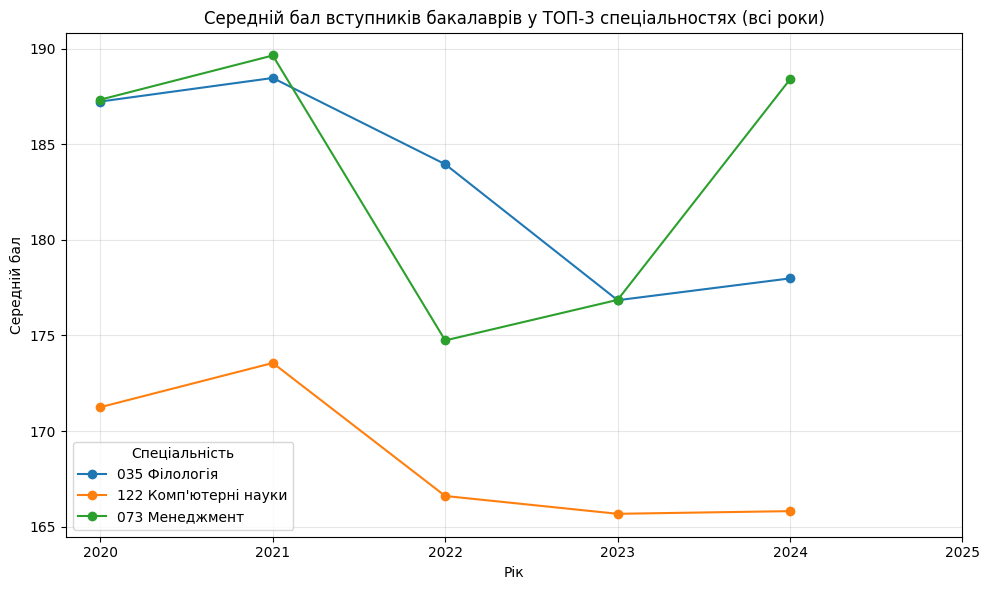

In [ ]:
analytics = AdmissionAnalytics(df_all_years)
analytics.plot_top3_all_years_bachelor()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

def plot_total_recommended_by_year_horizontal(df: pd.DataFrame):
    """
    Горизонтальний bar chart: сумарна кількість 'Усього рекомендовано' по роках.
    Бари ростуть зліва направо з градієнтним забарвленням.
    """
    df_grouped = (
      df[df['Освітній ступінь'] == 'Бакалавр']       # фільтруємо тільки бакалаврів
      .groupby('Рік')['Усього рекомендовано']
      .sum()
      .sort_values(ascending=True)
      .reset_index()
    )

    # Генеруємо градієнт кольорів (від світлого до темного синього)
    n = len(df_grouped)
    colors = cm.Blues(np.linspace(0.4, 0.9, n))  # 0.4-0.9 дає гарний контраст

    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(df_grouped['Рік'], df_grouped['Усього рекомендовано'], color=colors)

    # Додаємо підписи значень всередину барів
    for bar in bars:
        width = bar.get_width()
        ax.text(width - width*0.01,                  # трохи всередину бару
                bar.get_y() + bar.get_height()/2,
                f'{int(width):,}',
                va='center', ha='right',            # вирівнювання по правому краю
                fontsize=11, color='white', weight='bold')

    # Оформлення
    ax.set_title('Кількість "Усього рекомендовано" за роками', fontsize=14)
    ax.set_xlabel('Кількість рекомендовано', fontsize=12)
    ax.set_ylabel('Рік', fontsize=12)
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

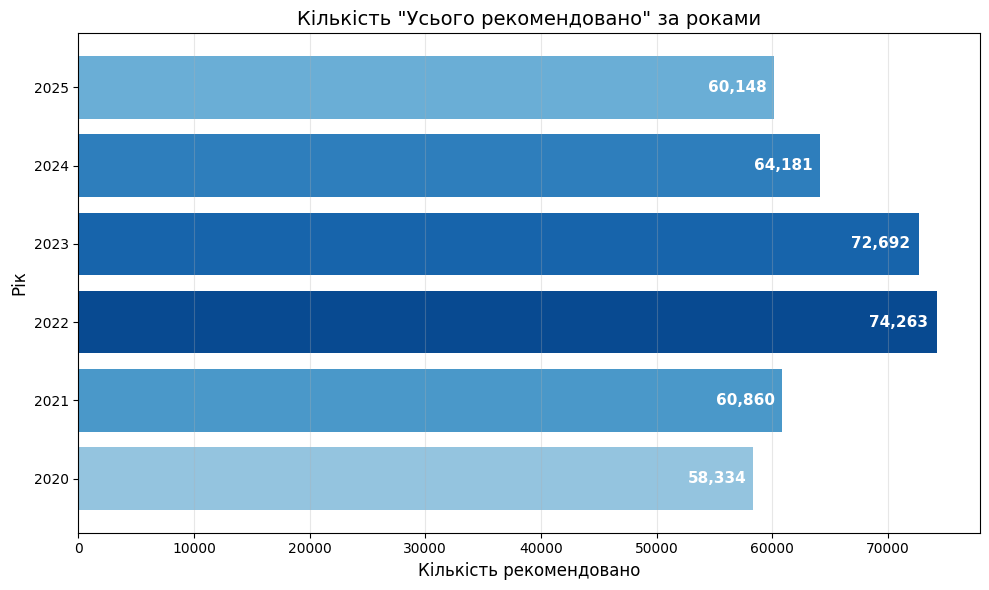

In [ ]:
plot_total_recommended_by_year_horizontal(df_all_years)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_recommended_bachelor_cs(df: pd.DataFrame):
    """
    Будує горизонтальний bar chart:
    - кількість 'Усього рекомендовано' по роках
    - лише для 'Бакалавр' і спеціальностей:
        * 122 Комп'ютерні науки
        * F3 Комп'ютерні науки
    - з градієнтною заливкою барів і білими підписами всередині
    """
    target_specs = ["122 Комп'ютерні науки", "F3 Комп'ютерні науки"]

    # Фільтр по бакалаврам і спеціальності
    filtered = df[
        (df['Освітній ступінь'] == 'Бакалавр') &
        (df['Спеціальність'].isin(target_specs))
    ]

    # Групування по роках
    df_grouped = (
        filtered.groupby('Рік')['Усього рекомендовано']
        .sum()
        .sort_values(ascending=True)
        .reset_index()
    )

    # Градієнт кольорів
    colors = sns.color_palette("Greens", n_colors=len(df_grouped))

    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(df_grouped['Рік'], df_grouped['Усього рекомендовано'], color=colors)

    # Підписи всередині барів
    for bar in bars:
        width = bar.get_width()
        ax.text(width - width * 0.01,
                bar.get_y() + bar.get_height() / 2,
                f'{int(width):,}',
                va='center', ha='right',
                color='white', fontsize=12, weight='bold')

    # Оформлення
    ax.set_xlabel("Кількість рекомендованих", fontsize=12)
    ax.set_ylabel("Рік", fontsize=12)
    ax.set_title("Усього рекомендовано — Комп'ютерні науки (Бакалавр)", fontsize=16)
    plt.tight_layout()
    plt.show()


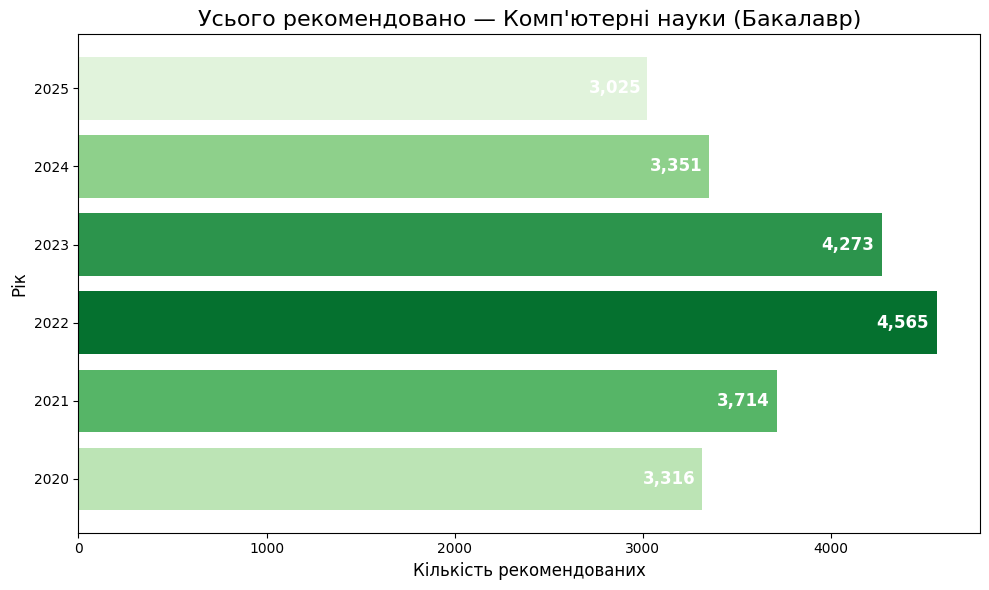

In [ ]:
plot_recommended_bachelor_cs(df_all_years)